# A Comprehensive Analysis of Survival Months of Breast Cancer Patients 

This is the codes corresponding to the paper entitled "A Comprehensive Analysis of Survival Months of Breast Cancer Patients as a Function of Surgical Procedures, Race, Tumor Subtypes, and Gene Expression".


Authors:
     Omer Mogultay (omer.mogultay@mavs.uta.edu) PhD student, Department of Mathematics in the University of Texas at Arlington
     Leili Shahriyai (lshahriyari@umass.edu), Advisor, Department of Mathematics and Statistics, University of Massachusetts Amherst 

We downloaded the clinical and gene expression data sets of 1082 patients with breast invasive carcinoma (BRCA) project from the cBioPortal. We combined BRCA (TCGA, PanCancer Atlas) data set and BRCA (TCGA,Provisional) data set. The RNA-Seq data, subtype and radiation therapy information were taken from BRCA (TCGA, PanCancer Atlas). Race, tumor status, surgical procedure and overall survival months were taken from provisional data. All data sets were combined based on unique patient identifier (patient id). 

We excluded missing values from this study. Due to missing information of tumor subtypes and very small sample size, we did not consider 12 male patients and one case of "AMERICAN INDIAN OR ALASKA NATIVE" in the analysis. Hence, in the present study patient refers to female patients. We ended up having 747 patients to continue further analysis. 

In order to find statistically significant differences between two samples in each box plots, we performed the non-parametric two sided Mann-Whitney U-test for testing if values of one sample are less than or greater than values of another sample. The significance levels were shown by stars. For example, "*" shows that the difference is significant with p value less than 0.05. "**" shows that p value less or equal than 0.01 and so on. All statistical analyses and computations were performed in Python v. 3.7. For box plots we adopted the codes from https://github.com/webermarcolivier/statannot.

To apply appropriate methods for analyzing gene expression data, we first visualized the data and looked at its statistical information. 
We calculated the average and standard deviation of each gene across patients as well as average and standard deviation of expressions in each primary tumors. In other words, if we denote the expression value of gene $j$ in patient $i$ by $g_{ij}$, we obtained the average and standard deviation of expression values in each patient $i$ by calculating $\bar{P}_i = avg(\{g_{ij} : 1\leq j\leq m \}) = \sum_j g_{ij} / m $ and $\sigma_{P_i} = std(\{g_{ij} : 1\leq j\leq m \})$, respectively, where $m$ is the total number of genes. We also obtained the average and standard deviation of expression levels of each gene $j$ across patients by calculating $\bar{G}_j = avg(\{g_{ij} : 1\leq i\leq n \})  = \sum_i g_{ij} / n $ and $\sigma_{G_j} = std(\{g_{ij} : 1\leq i\leq n \})$, respectively, where $n$ is the total number of patients.

We observed that the distributions of whole genome expressions of patients' primary tumor are very similar to each other, but the distribution of expression levels of each gene across patients are quite different from one gene to another. For this reason to avoid losing statistical information of the data, we scaled the gene expression levels of primary tumors for each patient separately instead of scaling each gene. In other words, we found maximum expression level of genes for each patient, and we then divided the values of each gene by the maximum value of gene expression of the same patient. 

Furthermore, after normalizing the data, we  utilized dimension reduction techniques, because the number of genes (20531) was much more than the number of patients (1082). Herein, we implemented a variance threshold method from scikit learn library to get highly variant genes. We found that ACTB, ADAM6, COL1A1, COL1A2, COL3A1, CPB1, EEF1A1, FN1, IGFBP5 and MGP are ten most variant genes across patients. 

Another popular dimension reduction method is Principal Component Analysis (PCA). Main idea is to reduce number of variables by maintaining most of the information in the data set. So, we performed PCA to find top ten principle components. Interestingly, among top 10 variant genes, we found five of them (COL1A2, COL1A1, COL3A1, ACTB, and EEF1A1) highly correlated with principal components. For example, ACTB is positively correlated with PC1 and COL1A2 is negatively correlated with PC2. 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# get the path of the file of .ipynb
notebook_path = os.path.dirname("LTCGA.ipynb")
location_of_data = notebook_path +"data/BreastInvasiveTCGAPanCancerAtlas/brca_tcga_pan_can_atlas_2018/"
rna_file_name = "data_RNA_Seq_v2_expression_median.txt"
clinical_file_name ="data_clinical_patient.txt"

In [2]:
def read_rna_file(location, name_file):
    """
    input location: string, location of the file
    input name_file:string, name of the RNA seq file
    This file is tab seperated and includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
    Out put: panda data frame
    function: read the file and set the 'Hugo_Symbol', 'Entrez_Gene_Id' columns as index
    """

    
    
    rna_file_path = location + name_file
    try:
        rna = pd.read_csv(rna_file_path,  sep='\t')
        
        #to make sure we do not process the name of genes we will convert them to string
        rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
        
        # make first two columns as indexx of data frame 
        rna =  rna.set_index([ 'Hugo_Symbol','Entrez_Gene_Id']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or two columns 'Hugo_Symbol', 'Entrez_Gene_Id' do not exist")
        print("***************")
    
    return rna

In [3]:
def read_clinical_file(location, name_file):
    """
    input location: string, location of the file
    input name_file:string, name of the clinical file
    This file is tab seperated and includes the column of 'PATIENT_ID' in the 5th row
    Out put: panda data frame
    function: read the file, skip first four rows, and set 'PATIENT_ID' as index
    """

    import pandas as pd
    
    clinical_file_path = location + name_file
    try:
        clinical_data = pd.read_csv(clinical_file_path,  sep='\t', skiprows=4)
        
        # make first the column PATIENT_ID as indexx of data frame 
        # clinical_data =  clinical_data.set_index([ 'PATIENT_ID']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or the column '#Patient Identifier' does not exist")
        print("***************")
    
    return clinical_data

In [4]:
original_rna = read_rna_file(location_of_data, rna_file_name)
original_clinical = read_clinical_file(location_of_data, clinical_file_name)
original_rna.head()

TCGA-3C-AAAU-01  TCGA-3C-AALI-01  TCGA-3C-AALJ-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426                0.0000           0.0000           0.9066   
            100133144               16.3644           9.2659          11.6228   
            100134869               12.9316          17.3790           9.2294   
            10357                   52.1503          69.7553         154.2970   
            10431                  408.0760         563.8930        1360.8300   

                            TCGA-3C-AALK-01  TCGA-4H-AAAK-01  TCGA-5L-AAT0-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426                0.0000           0.0000           0.0000   
            100133144               12.0894           6.8468           3.9889   
            100134869               11.0799          14.4298          13.6090   
            10357                  143.8640          84.2128         114.2570   
            10431                  865.5360         766.3830         807.7430   

                            TCGA-5T-A9QA-01  TCGA-A1-A0SB-01  TCGA-A1-A0SD-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426                0.0000           0.0000           0.0000   
            100133144                1.4644          15.3396           9.5178   
            100134869                8.9958          14.3935          11.3241   
            10357                  107.5630         116.3870          60.2630   
            10431                 1420.5000         657.2810         977.9180   

                            TCGA-A1-A0SE-01       ...         TCGA-UL-AAZ6-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
nan         100130426                0.0000       ...                  0.0000   
            100133144               10.0370       ...                  0.3992   
            100134869                4.4426       ...                 14.3720   
            10357                  153.1450       ...                135.6240   
            10431                 1084.3300       ...               1570.1400   

                            TCGA-UU-A93S-01  TCGA-V7-A7HQ-01  TCGA-W8-A86G-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426                0.0000           0.0000           0.0000   
            100133144                4.3126           0.0000           5.5624   
            100134869               10.8828           3.0792          14.3711   
            10357                  136.1290          29.9974         128.3150   
            10431                 2886.4000        1721.8800         697.6740   

                            TCGA-WT-AB41-01  TCGA-WT-AB44-01  TCGA-XX-A899-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426                0.0000           0.0000           0.0000   
            100133144                0.0000           0.0000          14.3858   
            100134869                6.3091           3.2580          21.4409   
            10357                   53.6278          42.2643         137.7760   
            10431                 1245.2700        1877.4200         652.7560   

                            TCGA-XX-A89A-01  TCGA-Z7-A8R5-01  TCGA-Z7-A8R6-01  
Hugo_Symbol Entrez_Gene_Id                                                     
nan         100130426                0.0000           0.0000           0.0000  
            100133144               22.3240           2.2638           6.8865  
            100134869               27.2744           7.2933          24.7795  
            10357                   64.1427          85.0461         167.5510  
            10431                  722.7210        1140.2800        1003.5700  

[5 rows x 1082 columns]

In [19]:
original_rna.shape

(20531, 1082)

In [5]:
# get the path for provisional data
location_of_data2 = notebook_path +"data/brca_tcga/"
rna_file_name2 = "data_RNA_Seq_v2_expression_median.txt"
clinical_file_name2 ="data_bcr_clinical_data_patient.txt"

In [6]:
provisional_rna = read_rna_file(location_of_data2, rna_file_name2)
provisional_clinical = read_clinical_file(location_of_data2, clinical_file_name2)


In [7]:
def normalizing_patients(df_rna_values):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    return df_normalized_rna_values

In [8]:
normalized_rna = normalizing_patients(original_rna)
normalized_rna.head()

TCGA-3C-AAAU-01  TCGA-3C-AALI-01  TCGA-3C-AALJ-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426              0.000000         0.000000         0.000005   
            100133144              0.000118         0.000048         0.000064   
            100134869              0.000093         0.000089         0.000051   
            10357                  0.000375         0.000358         0.000853   
            10431                  0.002936         0.002897         0.007526   

                            TCGA-3C-AALK-01  TCGA-4H-AAAK-01  TCGA-5L-AAT0-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426              0.000000         0.000000         0.000000   
            100133144              0.000028         0.000017         0.000016   
            100134869              0.000025         0.000035         0.000055   
            10357                  0.000331         0.000203         0.000465   
            10431                  0.001992         0.001851         0.003286   

                            TCGA-5T-A9QA-01  TCGA-A1-A0SB-01  TCGA-A1-A0SD-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426              0.000000         0.000000         0.000000   
            100133144              0.000016         0.000059         0.000023   
            100134869              0.000096         0.000055         0.000028   
            10357                  0.001142         0.000445         0.000149   
            10431                  0.015083         0.002514         0.002413   

                            TCGA-A1-A0SE-01       ...         TCGA-UL-AAZ6-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
nan         100130426              0.000000       ...            0.000000e+00   
            100133144              0.000045       ...            8.616168e-07   
            100134869              0.000020       ...            3.101993e-05   
            10357                  0.000694       ...            2.927253e-04   
            10431                  0.004915       ...            3.388925e-03   

                            TCGA-UU-A93S-01  TCGA-V7-A7HQ-01  TCGA-W8-A86G-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426              0.000000         0.000000         0.000000   
            100133144              0.000011         0.000000         0.000028   
            100134869              0.000029         0.000012         0.000073   
            10357                  0.000358         0.000113         0.000656   
            10431                  0.007582         0.006497         0.003564   

                            TCGA-WT-AB41-01  TCGA-WT-AB44-01  TCGA-XX-A899-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100130426              0.000000         0.000000         0.000000   
            100133144              0.000000         0.000000         0.000070   
            100134869              0.000030         0.000012         0.000105   
            10357                  0.000254         0.000157         0.000673   
            10431                  0.005899         0.006976         0.003191   

                            TCGA-XX-A89A-01  TCGA-Z7-A8R5-01  TCGA-Z7-A8R6-01  
Hugo_Symbol Entrez_Gene_Id                                                     
nan         100130426              0.000000         0.000000         0.000000  
            100133144              0.000044         0.000009         0.000051  
            100134869              0.000054         0.000029         0.000185  
            10357                  0.000126         0.000334         0.001249  
            10431                  0.001422         0.004475         0.007480  

[5 rows x 1082 columns]

In [9]:
#Dropping Entrez_Gene_Id from index
my_rna = normalized_rna.reset_index(level='Entrez_Gene_Id', drop=True)
my_rna_tr = my_rna.T #transpose
patient_id_rna = my_rna_tr.index #patient IDs in RNA file
dic_patient_id = {id_:id_[:-3] for id_ in patient_id_rna}

In [10]:
rna_data = my_rna_tr.rename(dic_patient_id, axis='index')
rna_data.index.names = ['PATIENT_ID']
newrna_1=rna_data.reset_index()
newrna_1.head()

Hugo_Symbol,PATIENT_ID,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,0.000000,0.000118,0.000093,0.000375,0.002936,0.0,0.008541,0.000000e+00,0.000000,...,0.002992,0.006706,0.000932,0.007252,0.011934,0.001860,0.008695,0.025237,0.013635,0.008494
1,TCGA-3C-AALI,0.000000,0.000048,0.000089,0.000358,0.002897,0.0,0.002651,5.587669e-06,0.000003,...,0.005967,0.004959,0.000307,0.002305,0.006901,0.001020,0.003101,0.028283,0.006775,0.002090
2,TCGA-3C-AALJ,0.000005,0.000064,0.000051,0.000853,0.007526,0.0,0.003274,0.000000e+00,0.000000,...,0.001689,0.013999,0.000196,0.002953,0.004252,0.001835,0.002943,0.030189,0.005214,0.002818
3,TCGA-3C-AALK,0.000000,0.000028,0.000025,0.000331,0.001992,0.0,0.001272,9.520040e-07,0.000000,...,0.000908,0.001539,0.000127,0.001007,0.001988,0.000404,0.001398,0.013097,0.001798,0.001613
4,TCGA-4H-AAAK,0.000000,0.000017,0.000035,0.000203,0.001851,0.0,0.000630,1.027818e-06,0.000000,...,0.000980,0.001629,0.000118,0.001025,0.002536,0.000034,0.001874,0.009763,0.002010,0.002130


In [11]:
# putting genes in another data frame
newrna_2= newrna_1[['PATIENT_ID','COL1A2','EEF1A1','ACTB']]

In [12]:
 # merge provisional clinical data and rna data w.r.t. patient id.
mergedata = pd.merge(newrna_2,
                     provisional_clinical[['PATIENT_ID','AGE','RACE','TUMOR_STATUS','SURGICAL_PROCEDURE_FIRST','OS_MONTHS']],
                     on='PATIENT_ID')
#mergedata.shape #(1081, 10)
mergedata.head()

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS
0,TCGA-3C-AAAU,0.249446,0.217603,0.301256,55,WHITE,WITH TUMOR,Modified Radical Mastectomy,132.95
1,TCGA-3C-AALI,0.507240,0.166319,0.550099,50,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Lumpectomy,131.57
2,TCGA-3C-AALJ,0.523817,0.316287,0.608773,62,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Modified Radical Mastectomy,48.42
3,TCGA-3C-AALK,0.544941,0.232810,0.227302,52,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,47.57
4,TCGA-4H-AAAK,0.720938,0.216569,0.228513,50,WHITE,TUMOR FREE,Modified Radical Mastectomy,11.43


In [13]:
 # merge original clinical data and rna data w.r.t. patient id.
mergedata2 = pd.merge(mergedata,
                     original_clinical[['PATIENT_ID','SUBTYPE','GENDER']],
                     on='PATIENT_ID')
#mergedata2.shape #(1081, 11)
mergedata2.head()

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS,SUBTYPE,GENDER
0,TCGA-3C-AAAU,0.249446,0.217603,0.301256,55,WHITE,WITH TUMOR,Modified Radical Mastectomy,132.95,BRCA_LumA,Female
1,TCGA-3C-AALI,0.507240,0.166319,0.550099,50,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Lumpectomy,131.57,BRCA_Her2,Female
2,TCGA-3C-AALJ,0.523817,0.316287,0.608773,62,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Modified Radical Mastectomy,48.42,BRCA_LumB,Female
3,TCGA-3C-AALK,0.544941,0.232810,0.227302,52,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,47.57,BRCA_LumA,Female
4,TCGA-4H-AAAK,0.720938,0.216569,0.228513,50,WHITE,TUMOR FREE,Modified Radical Mastectomy,11.43,BRCA_LumA,Female


In [14]:
# Male patients have no subtype information, we are going to remove Male patients by dropping NAN values.
mergedata2.loc[mergedata2['GENDER']=="Male"]

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS,SUBTYPE,GENDER
16,TCGA-A1-A0SM,0.754271,0.228336,0.367366,77,WHITE,TUMOR FREE,Modified Radical Mastectomy,7.95,NaN,Male
195,TCGA-A8-A085,0.658892,0.546872,0.268703,44,[Not Available],TUMOR FREE,Other,36.93,NaN,Male
277,TCGA-AC-A62V,0.503395,0.319676,0.521183,58,BLACK OR AFRICAN AMERICAN,WITH TUMOR,Modified Radical Mastectomy,11.43,NaN,Male
371,TCGA-AO-A1KQ,0.375244,0.302466,0.690422,84,WHITE,TUMOR FREE,Modified Radical Mastectomy,61.83,NaN,Male
382,TCGA-AQ-A54O,0.340784,0.112471,0.786709,51,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,32.88,NaN,Male
414,TCGA-AR-A1AV,0.640363,0.556483,0.435504,68,WHITE,[Not Available],Modified Radical Mastectomy,61.24,NaN,Male
518,TCGA-BH-A0B4,0.691505,0.324952,0.371022,65,WHITE,TUMOR FREE,Modified Radical Mastectomy,39.13,NaN,Male
544,TCGA-BH-A0DD,0.311387,0.538217,0.358083,58,WHITE,TUMOR FREE,Modified Radical Mastectomy,81.67,NaN,Male
753,TCGA-D8-A1XS,0.855487,0.340200,0.349892,48,WHITE,TUMOR FREE,Modified Radical Mastectomy,16.29,NaN,Male
802,TCGA-E2-A14W,0.075934,0.123105,0.146918,78,WHITE,TUMOR FREE,Simple Mastectomy,32,NaN,Male


In [15]:
mergedata2.dropna(inplace=True) #dropping missing values and male
print(mergedata2.isnull().sum()) #see how many missing value you have

PATIENT_ID                  0
COL1A2                      0
EEF1A1                      0
ACTB                        0
AGE                         0
RACE                        0
TUMOR_STATUS                0
SURGICAL_PROCEDURE_FIRST    0
OS_MONTHS                   0
SUBTYPE                     0
GENDER                      0
dtype: int64


In [16]:
# clear the data set
mergedata2=pd.DataFrame(mergedata2[mergedata2["SURGICAL_PROCEDURE_FIRST"] != '[Not Available]'])
mergedata2=pd.DataFrame(mergedata2[mergedata2["SURGICAL_PROCEDURE_FIRST"] != '[Discrepancy]'])
mergedata2=pd.DataFrame(mergedata2[mergedata2["TUMOR_STATUS"] != '[Not Available]'])
mergedata2=pd.DataFrame(mergedata2[mergedata2["RACE"] != '[Not Available]'])
mergedata2=pd.DataFrame(mergedata2[mergedata2["RACE"] != 'AMERICAN INDIAN OR ALASKA NATIVE'])
mergedata2=pd.DataFrame(mergedata2[mergedata2["OS_MONTHS"] != '[Not Available]'])



In [17]:
#set as float so that python can recognize as number
mergedata2["OS_MONTHS"]=mergedata2["OS_MONTHS"].astype(float)
mergedata2["AGE"]=mergedata2["AGE"].astype(float)
mergedata2.head()

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS,SUBTYPE,GENDER
0,TCGA-3C-AAAU,0.249446,0.217603,0.301256,55.0,WHITE,WITH TUMOR,Modified Radical Mastectomy,132.95,BRCA_LumA,Female
1,TCGA-3C-AALI,0.507240,0.166319,0.550099,50.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Lumpectomy,131.57,BRCA_Her2,Female
2,TCGA-3C-AALJ,0.523817,0.316287,0.608773,62.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Modified Radical Mastectomy,48.42,BRCA_LumB,Female
3,TCGA-3C-AALK,0.544941,0.232810,0.227302,52.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,47.57,BRCA_LumA,Female
4,TCGA-4H-AAAK,0.720938,0.216569,0.228513,50.0,WHITE,TUMOR FREE,Modified Radical Mastectomy,11.43,BRCA_LumA,Female


In [18]:
mergedata2.shape 
# (696, 12) with radiation therapy
# (747, 11) without radiation therapy

(747, 11)

### Functions for statistical annotations and box plot

In [120]:
from matplotlib.text import Text
import matplotlib.pyplot as plt
from matplotlib import transforms, lines
import matplotlib.transforms as mtransforms
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn.utils import remove_na

from scipy import stats


"""
This part of code has been adopted from https://github.com/webermarcolivier/statannot
"""

def stat_test(box_data1, box_data2, test):
    testShortName = ''
    formattedOutput = None
    if test == 'Mann-Whitney':
        u_stat, pval = stats.mannwhitneyu(box_data1, box_data2, alternative='two-sided')
        testShortName = 'M.W.W.'
        formattedOutput = "MWW RankSum two-sided P_val={:.3e} U_stat={:.3e}".format(pval, u_stat)
    elif test == 't-test_ind':
        stat, pval = stats.ttest_ind(a=box_data1, b=box_data2)
        testShortName = 't-test_ind'
        formattedOutput = "t-test independent samples, P_val={:.3e} stat={:.3e}".format(pval, stat)
    elif test == 't-test_paired':
        stat, pval = stats.ttest_rel(a=box_data1, b=box_data2)
        testShortName = 't-test_rel'
        formattedOutput = "t-test paired samples, P_val={:.3e} stat={:.3e}".format(pval, stat)

    return pval, formattedOutput, testShortName



def pvalAnnotation_text(x, pvalueThresholds):
    singleValue = False
    if type(x) is np.array:
        x1 = x
    else:
        x1 = np.array([x])
        singleValue = True
    # Sort the threshold array
    pvalueThresholds = pd.DataFrame(pvalueThresholds).sort_values(by=0, ascending=False).values
    xAnnot = pd.Series(["" for _ in range(len(x1))])
    for i in range(0, len(pvalueThresholds)):
        if (i < len(pvalueThresholds)-1):
            condition = (x1 <= pvalueThresholds[i][0]) & (pvalueThresholds[i+1][0] < x1)
            xAnnot[condition] = pvalueThresholds[i][1]
        else:
            condition = x1 < pvalueThresholds[i][0]
            xAnnot[condition] = pvalueThresholds[i][1]

    return xAnnot if not singleValue else xAnnot.iloc[0]


def add_stat_annotation(ax,
                        data=None, x=None, y=None, hue=None, order=None, hue_order=None,
                        boxPairList=None, 
                        test='Mann-Whitney', textFormat='star', loc='inside',
                        pvalueThresholds=[[1,"ns"], [0.0499,"*"], [1e-2,"**"], [1e-3,"***"], [1e-4,"****"]],
                        useFixedOffset=False, lineYOffsetToBoxAxesCoord=None, lineYOffsetAxesCoord=None,
                        lineHeightAxesCoord=0.02, textYOffsetPoints=1,
                        color='0.2', linewidth=1.5, fontsize='medium', verbose=1, ns=False, off_set=1.0):
    """
    User should use the same argument for the data, x, y, hue, order, hue_order as the seaborn boxplot function.

    boxPairList can be of either form:
    For non-grouped boxplot: [(cat1, cat2), (cat3, cat4)]
    For boxplot grouped by hue: [((cat1, hue1), (cat2, hue2)), ((cat3, hue3), (cat4, hue4))]
    """

    def find_x_position_box(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        """
        if boxPlotter.plot_hues is None:
            cat = boxName
            hueOffset = 0
        else:
            cat = boxName[0]
            hue = boxName[1]
            hueOffset = boxPlotter.hue_offsets[boxPlotter.hue_names.index(hue)]

        groupPos = boxPlotter.group_names.index(cat)
        boxPos = groupPos + hueOffset
        return boxPos


    def get_box_data(boxPlotter, boxName):

        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")

        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        if boxPlotter.plot_hues is None:
            cat = boxName
        else:
            cat = boxName[0]
            hue = boxName[1]

        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]

        if boxPlotter.plot_hues is None:
            # Draw a single box or a set of boxes
            # with a single level of grouping
            box_data = remove_na(group_data)
        else:
            hue_level = hue
            hue_mask = boxPlotter.plot_hues[i] == hue_level
            box_data = remove_na(group_data[hue_mask])

        return box_data

    fig = plt.gcf()

    validList = ['inside', 'outside']
    if loc not in validList:
        raise ValueError("loc value should be one of the following: {}.".format(', '.join(validList)))
    validList = ['t-test_ind', 't-test_paired', 'Mann-Whitney']
    if test not in validList:
        raise ValueError("test value should be one of the following: {}.".format(', '.join(validList)))

    if verbose >= 1 and textFormat == 'star':
        print("pvalue annotation legend:")
        pvalueThresholds = pd.DataFrame(pvalueThresholds).sort_values(by=0, ascending=False).values
        for i in range(0, len(pvalueThresholds)):
            if (i < len(pvalueThresholds)-1):
                print('{}: {:.2e} < p <= {:.2e}'.format(pvalueThresholds[i][1], pvalueThresholds[i+1][0], pvalueThresholds[i][0]))
            else:
                print('{}: p <= {:.2e}'.format(pvalueThresholds[i][1], pvalueThresholds[i][0]))
        print()

    # Create the same BoxPlotter object as seaborn's boxplot
    boxPlotter = sns.categorical._BoxPlotter(x, y, hue, data, order, hue_order,
                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                             dodge=True, fliersize=5, linewidth=None)
    plotData = boxPlotter.plot_data

    xtickslabels = [t.get_text() for t in ax.xaxis.get_ticklabels()]
    ylim = ax.get_ylim()
    yRange = ylim[1] - ylim[0]

    if lineYOffsetAxesCoord is None:
        if loc == 'inside':
            lineYOffsetAxesCoord = 0.05
            if lineYOffsetToBoxAxesCoord is None:
                lineYOffsetToBoxAxesCoord = 0.06
        elif loc == 'outside':
            lineYOffsetAxesCoord = 0.03
            lineYOffsetToBoxAxesCoord = lineYOffsetAxesCoord
    else:
        if loc == 'inside':
            if lineYOffsetToBoxAxesCoord is None:
                lineYOffsetToBoxAxesCoord = 0.06
        elif loc == 'outside':
            lineYOffsetToBoxAxesCoord = lineYOffsetAxesCoord
    yOffset = lineYOffsetAxesCoord*yRange
    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

    yStack = []
    annList = []
    for box1, box2 in boxPairList:

        valid = None
        groupNames = boxPlotter.group_names
        hueNames = boxPlotter.hue_names
        if boxPlotter.plot_hues is None:
            cat1 = box1
            cat2 = box2
            hue1 = None
            hue2 = None
            label1 = '{}'.format(cat1)
            label2 = '{}'.format(cat2)
            valid = cat1 in groupNames and cat2 in groupNames
        else:
            cat1 = box1[0]
            hue1 = box1[1]
            cat2 = box2[0]
            hue2 = box2[1]
            label1 = '{}_{}'.format(cat1, hue1)
            label2 = '{}_{}'.format(cat2, hue2)
            valid = cat1 in groupNames and cat2 in groupNames and hue1 in hueNames and hue2 in hueNames


        if valid:
            # Get position of boxes
            x1 = find_x_position_box(boxPlotter, box1)
            x2 = find_x_position_box(boxPlotter, box2)
            box_data1 = get_box_data(boxPlotter, box1)
            box_data2 = get_box_data(boxPlotter, box2)
            ymax1 = off_set* np.quantile(box_data1,0.98)
            ymax2 =  off_set* np.quantile(box_data2, 0.98)

            pval, formattedOutput, testShortName = stat_test(box_data1, box_data2, test)
            if verbose >= 2: print ("{} v.s. {}: {}".format(label1, label2, formattedOutput))
            
            if ns or pval<=0.05:

                if textFormat == 'full':
                    text = "{} p < {:.2e}".format(testShortName, pval)
                elif textFormat is None:
                    text = None
                elif textFormat is 'star':
                    text = pvalAnnotation_text(pval, pvalueThresholds)

                if loc == 'inside':
                    yRef = max(ymax1, ymax2)
                elif loc == 'outside':
                    yRef = ylim[1]

                if len(yStack) > 0:
                    yRef2 = max(yRef, max(yStack))
                else:
                    yRef2 = yRef

                if len(yStack) == 0:
                    y = yRef2 + yOffsetToBox
                else:
                    y = yRef2 + 0.01* yOffset
                h = lineHeightAxesCoord*yRange
                lineX, lineY = [x1, x1, x2, x2], [y, y + h, y + h, y]
                if loc == 'inside':
                        ax.plot(lineX, lineY, lw=linewidth, c=color)
                elif loc == 'outside':
                        line = lines.Line2D(lineX, lineY, lw=linewidth, c=color, transform=ax.transData)
                        line.set_clip_on(False)
                        ax.add_line(line)


                if text is not None:
                    ann = ax.annotate(text, xy=(np.mean([x1, x2]), y + h),
                                      xytext=(0, textYOffsetPoints), textcoords='offset points',
                                      xycoords='data', ha='center', va='bottom', fontsize=fontsize,
                                      clip_on=False, annotation_clip=False)
                    annList.append(ann)

                ax.set_ylim((ylim[0], 1.1*(y + h)))

                if text is not None:
                    plt.draw()
                    yTopAnnot = None
                    gotMatplotlibError = False
                    if not useFixedOffset:
                        try:
                            bbox = ann.get_window_extent()
                            bbox_data = bbox.transformed(ax.transData.inverted())
                            yTopAnnot = bbox_data.ymax
                        except RuntimeError:
                            gotMatplotlibError = True

                    if useFixedOffset or gotMatplotlibError:
                        if verbose >= 1:
                            print("Warning: cannot get the text bounding box. Falling back to a fixed y offset. Layout may be not optimal.")
                        # We will apply a fixed offset in points, based on the font size of the annotation.
                        fontsizePoints = FontProperties(size='medium').get_size_in_points()
                        offsetTrans = mtransforms.offset_copy(ax.transData, fig=fig,
                                                              x=0, y=0.8*fontsizePoints + textYOffsetPoints, units='points')
                        yTopDisplay = offsetTrans.transform((0, y + h))
                        yTopAnnot = ax.transData.inverted().transform(yTopDisplay)[1]
                else:
                    yTopAnnot = y + h

                yStack.append(yTopAnnot)
        else:

            raise ValueError("boxPairList contains an unvalid box pair.")
            
            pass


    yStackMax = max(yStack)
    if loc == 'inside':
        ax.set_ylim((ylim[0], 1.03*yStackMax))
    elif loc == 'outside':
        ax.set_ylim((ylim[0], ylim[1]))

    return ax

In [174]:
def plot_box(data, x, y, hue, boxPairList_,x_label="" ,y_label="",x_position=None,y_position=None, c_label="",font_size=None,title="",figure_name="",hue_stat=True,palette=None,ns=False,order=None,hue_order=None,off_set =1.0):
    sns.set(rc={'figure.figsize':(9,9)})
    sns.set(style="white", color_codes=True)
    ax=sns.swarmplot(x=x,y= y,data=data, dodge=True, hue=hue,hue_order=hue_order,order=order,palette=palette)
    ax2=sns.boxplot(x= x ,y= y ,data= data, hue=hue, color='w',order=order)
    plt.xticks(rotation=0)

    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = ax.get_legend_handles_labels()

    # When creating the legend, only use the first three elements
    # to effectively remove the last three.
    l = plt.legend(handles[3:], labels[3:])
    
    if hue_stat:
        add_stat_annotation(ax,data=data, x=x, y=y, hue=hue, ns= ns, useFixedOffset= False, off_set = off_set,
                        boxPairList=boxPairList_ , test='Mann-Whitney', textFormat='star',loc='inside',verbose=1)
    else:
        add_stat_annotation(ax,data=data, x=x, y=y, ns=ns, useFixedOffset=False, off_set =off_set,
                        boxPairList=boxPairList_ , test='Mann-Whitney', textFormat='star',loc='inside',verbose=1)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    ax.text(x=x_position, y=y_position,s=c_label,weight='bold',fontsize=font_size)

    plt.savefig(figure_name,format='eps',bbox_inches='tight',dpi=1000)

    plt.show()

pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



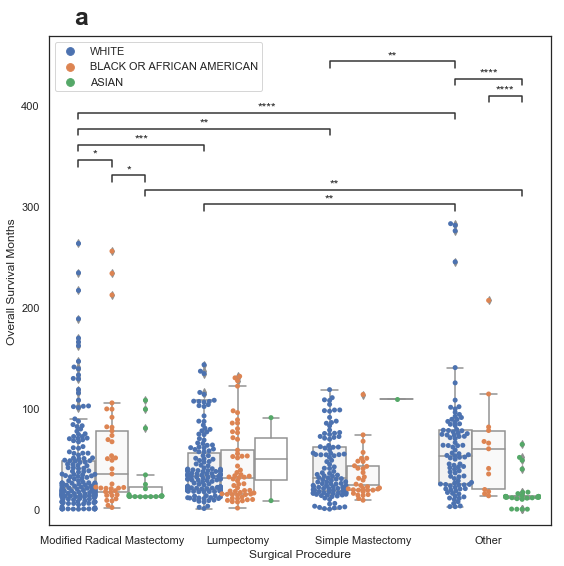

In [146]:
# this code chunk is for every combination between races and surgical procedures
from  itertools import combinations

races= ['WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN']
surgical = ['Modified Radical Mastectomy','Lumpectomy', 'Simple Mastectomy', 'Other']

inside_cat= [((a,b[0]),(a,b[1])) for a in surgical for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(surgical,2) for b in races ]

# see all combination of races and surgical procedures
all_cat = inside_cat + outside_cat


plot_box(mergedata2, "SURGICAL_PROCEDURE_FIRST", 'OS_MONTHS', 'RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Surgical Procedure",y_label="Overall Survival Months",x_position=-0.3,y_position=480,c_label="a",font_size=25,figure_name='surgical_OS_race.eps' ,off_set=1,hue_stat=True, ns=False)


In [288]:
# We can manually check if stars (*) are correct or not
t_white=mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(mergedata2["RACE"] == "WHITE")]
t_black=mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]
t_asian=mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(mergedata2["RACE"] == "ASIAN")]
t_white2=mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")&(mergedata2["RACE"] == "WHITE")]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(t_white['OS_MONTHS'],t_white2['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=8927.500, p=0.007
Different distribution (reject H0)


In [147]:
print("Modified Radical Mastectomy")
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Lumpectomy")
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Simple Mastectomy")
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Other")
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (mergedata2["RACE"] == "ASIAN")].shape)


Modified Radical Mastectomy
(205, 11)
(37, 11)
(19, 11)
Lumpectomy
(146, 11)
(57, 11)
(2, 11)
Simple Mastectomy
(107, 11)
(34, 11)
(1, 11)
Other
(93, 11)
(13, 11)
(33, 11)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



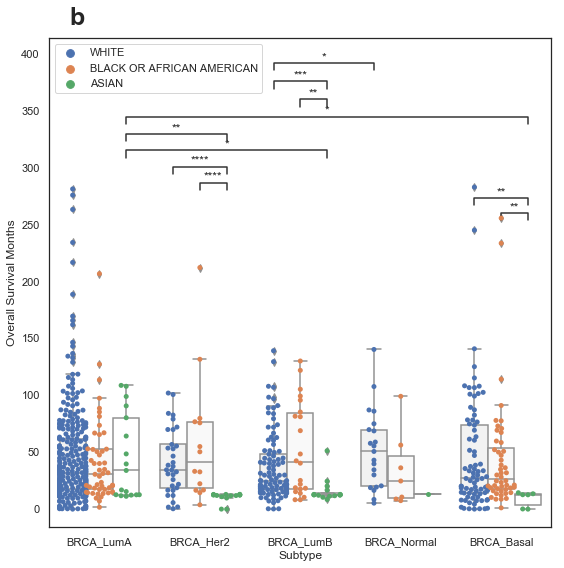

In [148]:
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN']
brca = ["BRCA_LumA","BRCA_LumB","BRCA_Normal","BRCA_Her2","BRCA_Basal"]

inside_cat= [((a,b[0]),(a,b[1])) for a in brca for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(brca,2) for b in races ]


all_cat = inside_cat + outside_cat


plot_box(mergedata2, "SUBTYPE", 'OS_MONTHS', 'RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Subtype",
         y_label="Overall Survival Months",x_position=-0.3,y_position=425,c_label="b",font_size=25,figure_name='subtype_OS_race.eps' ,off_set=1,hue_stat=True, ns=False)


In [289]:
# We can manually check if stars (*) are correct or not
t_white=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")&(mergedata2["RACE"] == "WHITE")]
t_white2=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")&(mergedata2["RACE"] == "WHITE")]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(t_white['OS_MONTHS'],t_white2['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=767.000, p=0.047
Different distribution (reject H0)


In [149]:
print("LumA")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "ASIAN")].shape)
print("LumB")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Her2")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Normal")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "ASIAN")].shape)
print("Basal")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "ASIAN")].shape)


LumA
(315, 11)
(50, 11)
(17, 11)
LumB
(101, 11)
(22, 11)
(16, 11)
Her2
(33, 11)
(14, 11)
(15, 11)
Normal
(21, 11)
(7, 11)
(1, 11)
Basal
(81, 11)
(48, 11)
(6, 11)


In [151]:
# Since we are losing patient when adding radiation therapy because merging based on patient id, we created another data frame to investigate only with radiation data.
radiation_data = pd.merge(mergedata2,
                     original_clinical[['PATIENT_ID','RADIATION_THERAPY']],
                     on='PATIENT_ID')
#mergedata.shape #(744, 13)
radiation_data.head()

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS,SUBTYPE,GENDER,RADIATION_THERAPY
0,TCGA-3C-AAAU,0.249446,0.217603,0.301256,55.0,WHITE,WITH TUMOR,Modified Radical Mastectomy,132.95,BRCA_LumA,Female,No
1,TCGA-3C-AALI,0.507240,0.166319,0.550099,50.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Lumpectomy,131.57,BRCA_Her2,Female,Yes
2,TCGA-3C-AALJ,0.523817,0.316287,0.608773,62.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Modified Radical Mastectomy,48.42,BRCA_LumB,Female,No
3,TCGA-3C-AALK,0.544941,0.232810,0.227302,52.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,47.57,BRCA_LumA,Female,No
4,TCGA-4H-AAAK,0.720938,0.216569,0.228513,50.0,WHITE,TUMOR FREE,Modified Radical Mastectomy,11.43,BRCA_LumA,Female,No


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



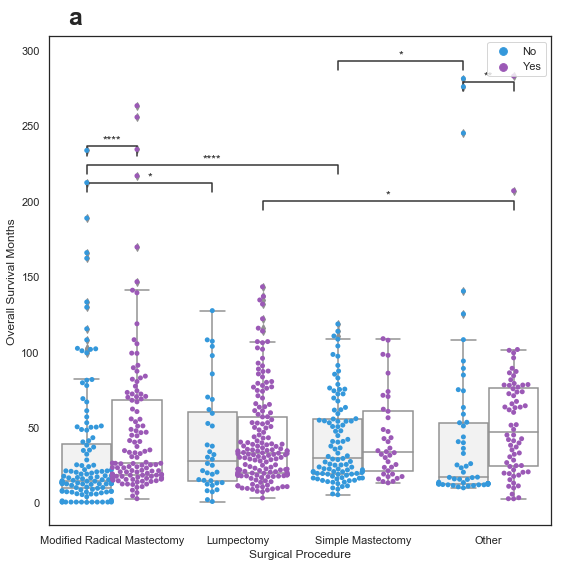

In [156]:
# change handles and labels from 3 to 2 as plt.legend(handles[2:], labels[2:]) in plot_box function
surgical = ['Modified Radical Mastectomy','Lumpectomy', 'Simple Mastectomy', 'Other']
radia= ['Yes','No'] 

inside_cat= [((a,b[0]),(a,b[1])) for a in surgical for b in combinations(radia, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(surgical,2) for b in radia ]
all_cat = inside_cat+outside_cat
palette=["#3498db","#9b59b6"] 
plot_box(radiation_data,"SURGICAL_PROCEDURE_FIRST",'OS_MONTHS','RADIATION_THERAPY', sorted(all_cat, key= lambda x:x[0]),x_label="Surgical Procedure",y_label="Overall Survival Months",x_position=-0.35,y_position=317,c_label="a",font_size=25,figure_name='surgical_os_radiation.eps' ,off_set=1,palette=palette,hue_stat=True,hue_order=None, ns=False)


In [157]:
print("Modified Radical Mastectomy")
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Lumpectomy")
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Simple Mastectomy")
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Other")
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Other")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SURGICAL_PROCEDURE_FIRST"]=="Other")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)


Modified Radical Mastectomy
(116, 12)
(128, 12)
Lumpectomy
(160, 12)
(36, 12)
Simple Mastectomy
(37, 12)
(97, 12)
Other
(66, 12)
(56, 12)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



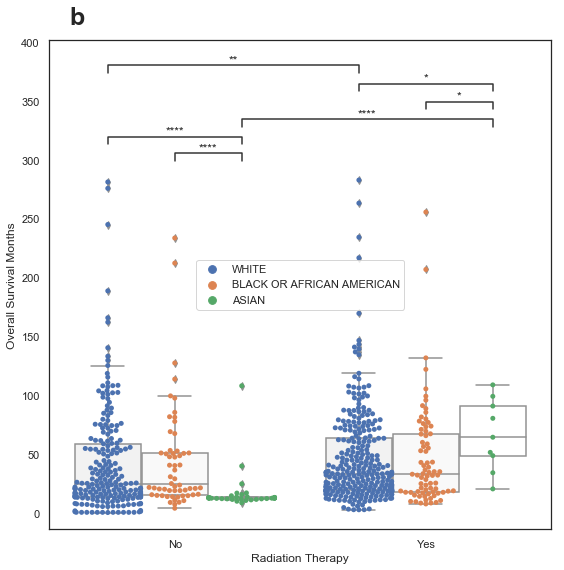

In [161]:
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN','ASIAN'] 

radia= ['Yes','No'] 

inside_cat= [((a,b[0]),(a,b[1])) for a in radia for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(radia,2) for b in races ]

all_cat = inside_cat+outside_cat

plot_box(radiation_data,"RADIATION_THERAPY",'OS_MONTHS','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Radiation Therapy",y_label="Overall Survival Months",x_position=-0.42,y_position=415,c_label="b",font_size=25, figure_name='radiation_os_race.eps' ,off_set=1.4,hue_stat=True, ns=False)

In [291]:
# We can manually check if stars (*) are correct or not
t_white=radiation_data.loc[(radiation_data["RADIATION_THERAPY"]=="Yes")&(radiation_data["RACE"] == "WHITE")]
t_asian=radiation_data.loc[(radiation_data["RADIATION_THERAPY"]=="Yes")&(radiation_data["RACE"] == "BLACK OR AFRICAN AMERICAN")]
t_asian2=radiation_data.loc[(radiation_data["RADIATION_THERAPY"]=="No")&(radiation_data["RACE"] == "ASIAN")]
t_white2=radiation_data.loc[(radiation_data["RADIATION_THERAPY"]=="No")&(radiation_data["RACE"] == "WHITE")]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(t_asian['OS_MONTHS'],t_asian2['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2736.500, p=0.000
Different distribution (reject H0)


In [162]:
print("NO")
print(radiation_data.loc[(radiation_data["RACE"]=="WHITE")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print(radiation_data.loc[(radiation_data["RACE"]=="BLACK OR AFRICAN AMERICAN")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print(radiation_data.loc[(radiation_data["RACE"]=="ASIAN")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)

print("YES")
print(radiation_data.loc[(radiation_data["RACE"]=="WHITE")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["RACE"]=="BLACK OR AFRICAN AMERICAN")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["RACE"]=="ASIAN")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)


NO
(217, 12)
(58, 12)
(42, 12)
YES
(293, 12)
(77, 12)
(9, 12)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



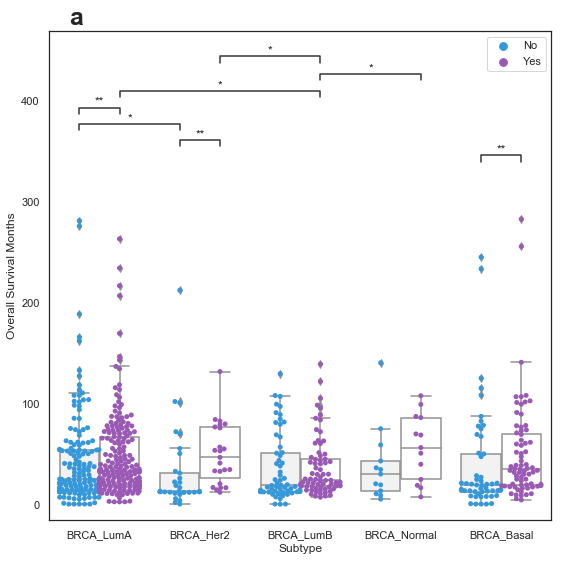

In [168]:
# change handles and labels from 3 to 2 as plt.legend(handles[2:], labels[2:]) in plot_box function
brca = ["BRCA_LumA","BRCA_LumB","BRCA_Normal","BRCA_Her2","BRCA_Basal"]

radia= ['Yes','No'] 

inside_cat= [((a,b[0]),(a,b[1])) for a in brca for b in combinations(radia, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(brca,2) for b in radia ]
palette=["#3498db","#9b59b6"]
all_cat = inside_cat+outside_cat

plot_box(radiation_data,"SUBTYPE",'OS_MONTHS','RADIATION_THERAPY', sorted(all_cat, key= lambda x:x[0]),x_label="Subtype",y_label="Overall Survival Months",x_position=-0.3,y_position=475,c_label="a",font_size=25,figure_name='subtype_os_radiation.eps' ,off_set=1.4,palette=palette,hue_stat=True, ns=False)

In [296]:
luma_yes=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumA")& (radiation_data["RADIATION_THERAPY"] == "Yes")]
luma_no=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumA")& (radiation_data["RADIATION_THERAPY"] == "No")]
her_yes=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Her2")& (radiation_data["RADIATION_THERAPY"] == "Yes")]
her_no=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Her2")& (radiation_data["RADIATION_THERAPY"] == "No")]
basal_yes=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Basal")& (radiation_data["RADIATION_THERAPY"] == "Yes")]
basal_no=radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Basal")& (radiation_data["RADIATION_THERAPY"] == "No")]
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(basal_yes['OS_MONTHS'],basal_no['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2563.000, p=0.002
Different distribution (reject H0)


In [169]:
print("LumA")
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumA")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumA")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Her2")
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Her2")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Her2")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("LumB")
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumB")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_LumB")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Normal")
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Normal")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Normal")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Basal")
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Basal")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["SUBTYPE"]=="BRCA_Basal")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)


LumA
(198, 12)
(160, 12)
Her2
(23, 12)
(32, 12)
LumB
(72, 12)
(59, 12)
Normal
(13, 12)
(13, 12)
Basal
(73, 12)
(53, 12)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



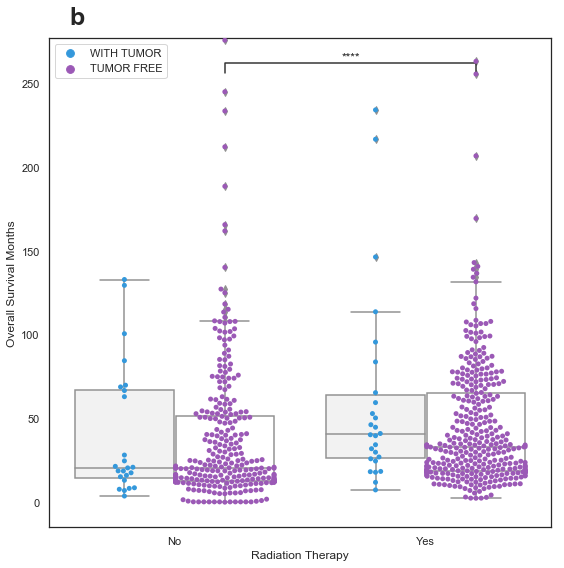

In [171]:
## change legends in plot_box function
tumor= ['WITH TUMOR','TUMOR FREE']
radia= ['Yes','No'] 

inside_cat= [((a,b[0]),(a,b[1])) for a in radia for b in combinations(tumor, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(radia,2) for b in tumor ]

all_cat = inside_cat+outside_cat
palette=["#3498db","#9b59b6"]
plot_box(radiation_data,'RADIATION_THERAPY','OS_MONTHS',"TUMOR_STATUS",sorted(all_cat, key= lambda x:x[0]),x_label="Radiation Therapy",y_label="Overall Survival Months",x_position=-0.42,y_position=285,c_label="b",font_size=25, figure_name='radiation_os_tumorstatus.eps',order=None ,hue_order=None,off_set=1.4,hue_stat=True, palette=palette ,ns=False)

In [293]:
# We can manually check if stars (*) are correct or not
free_no=radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="TUMOR FREE")& (radiation_data["RADIATION_THERAPY"] == "No")]
tumor_no=radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="TUMOR FREE")& (radiation_data["RADIATION_THERAPY"] == "Yes")]
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(free_no['OS_MONTHS'],tumor_no['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=40089.500, p=0.000
Different distribution (reject H0)


In [172]:
print("Tumor Status without Radiation")
print(radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="TUMOR FREE")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print(radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="WITH TUMOR")& (radiation_data["RADIATION_THERAPY"] == "No")].shape)
print("Tumor Status with Radiation")
print(radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="TUMOR FREE")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)
print(radiation_data.loc[(radiation_data["TUMOR_STATUS"]=="WITH TUMOR")& (radiation_data["RADIATION_THERAPY"] == "Yes")].shape)


Tumor Status without Radiation
(293, 12)
(24, 12)
Tumor Status with Radiation
(353, 12)
(26, 12)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



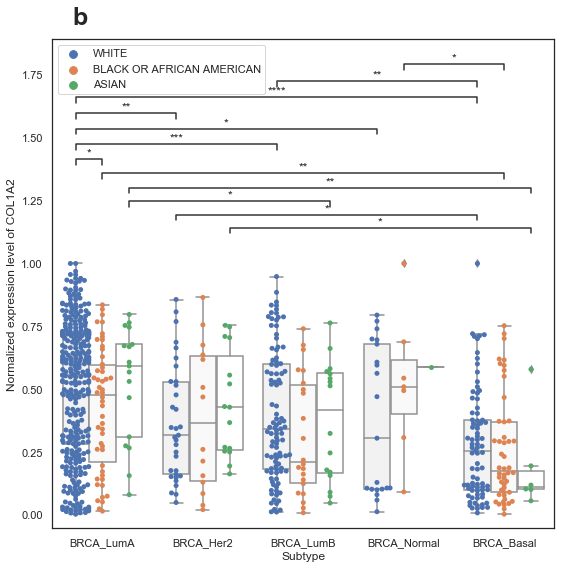

In [177]:
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN','ASIAN']
brca = ["BRCA_LumA","BRCA_LumB","BRCA_Normal","BRCA_Her2","BRCA_Basal"]
inside_cat= [((a,b[0]),(a,b[1])) for a in brca for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(brca,2) for b in races ]
all_cat = inside_cat+outside_cat


plot_box(mergedata2, "SUBTYPE", 'COL1A2','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Subtype",y_label="Normalized expression level of COL1A2",x_position=-0.3,y_position=1.95,c_label="b",font_size=25,figure_name='sub_race_col1a2.eps' ,off_set=1.4,hue_stat=True, ns=False)


In [304]:
# We can manually check if stars (*) are correct or not
luma_white=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")&(mergedata2["RACE"] == "WHITE")]
luma_black=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]
basal_black=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]

her2_white=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")&(mergedata2["RACE"] == "WHITE")]
normal_white=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")&(mergedata2["RACE"] == "WHITE")]

luma_asian=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")&(mergedata2["RACE"] == "ASIAN")]
lumb_asian=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")&(mergedata2["RACE"] == "ASIAN")]
basal_asian=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")&(mergedata2["RACE"] == "ASIAN")]


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(lumb_asian['COL1A2'],luma_asian['COL1A2'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=81.000, p=0.050
Different distribution (reject H0)


In [178]:
print("NUMBER OF PATIENTS in subtypes for LumA")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumA")& (mergedata2["RACE"] == "ASIAN")].shape)
print("NUMBER OF PATIENTS in subtypes for Her2")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")& (mergedata2["RACE"] == "ASIAN")].shape)
print("NUMBER OF PATIENTS in subtypes for LumB")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_LumB")& (mergedata2["RACE"] == "ASIAN")].shape)
print("NUMBER OF PATIENTS in subtypes for Normal")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Normal")& (mergedata2["RACE"] == "ASIAN")].shape)
print("NUMBER OF PATIENTS in subtypes for Basal")
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "WHITE")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Basal")& (mergedata2["RACE"] == "ASIAN")].shape)


NUMBER OF PATIENTS in subtypes for LumA
(315, 11)
(50, 11)
(17, 11)
NUMBER OF PATIENTS in subtypes for Her2
(33, 11)
(14, 11)
(15, 11)
NUMBER OF PATIENTS in subtypes for LumB
(101, 11)
(22, 11)
(16, 11)
NUMBER OF PATIENTS in subtypes for Normal
(21, 11)
(7, 11)
(1, 11)
NUMBER OF PATIENTS in subtypes for Basal
(81, 11)
(48, 11)
(6, 11)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



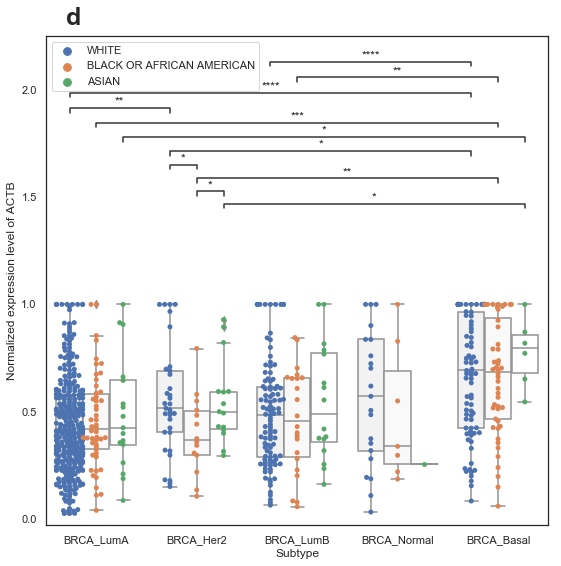

In [179]:
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN','ASIAN']
brca = ["BRCA_LumA","BRCA_LumB","BRCA_Normal","BRCA_Her2","BRCA_Basal"]
inside_cat= [((a,b[0]),(a,b[1])) for a in brca for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(brca,2) for b in races ]
all_cat = inside_cat+outside_cat


plot_box(mergedata2, "SUBTYPE", 'ACTB','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Subtype",y_label="Normalized expression level of ACTB",x_position=-0.3,y_position=2.3,c_label="d",font_size=25,figure_name='sub_race_actb.eps',off_set=1.4,hue_stat=True, ns=False)


In [308]:
# We can manually check if stars (*) are correct or not

her2_white=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")&(mergedata2["RACE"] == "WHITE")]
her2_black=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]
her2_asian=mergedata2.loc[(mergedata2["SUBTYPE"]=="BRCA_Her2")&(mergedata2["RACE"] == "ASIAN")]


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(her2_white['ACTB'],her2_black['ACTB'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=325.000, p=0.030
Different distribution (reject H0)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TUMOR FREE_WHITE v.s. TUMOR FREE_BLACK OR AFRICAN AMERICAN: MWW RankSum two-sided P_val=2.053e-03 U_stat=3.696e+04
TUMOR FREE_WHITE v.s. TUMOR FREE_ASIAN: MWW RankSum two-sided P_val=8.058e-01 U_stat=1.408e+04
TUMOR FREE_BLACK OR AFRICAN AMERICAN v.s. TUMOR FREE_ASIAN: MWW RankSum two-sided P_val=5.265e-02 U_stat=2.813e+03
WITH TUMOR_WHITE v.s. WITH TUMOR_BLACK OR AFRICAN AMERICAN: MWW RankSum two-sided P_val=9.242e-02 U_stat=5.030e+02
WITH TUMOR_WHITE v.s. TUMOR FREE_WHITE: MWW RankSum two-sided P_val=2.169e-01 U_stat=1.361e+04
WITH TUMOR_BLACK OR AFRICAN AMERICAN v.s. TUMOR FREE_BLACK OR AFRICAN AMERICAN: MWW RankSum two-sided P_val=8.889e-01 U_stat=9.780e+02


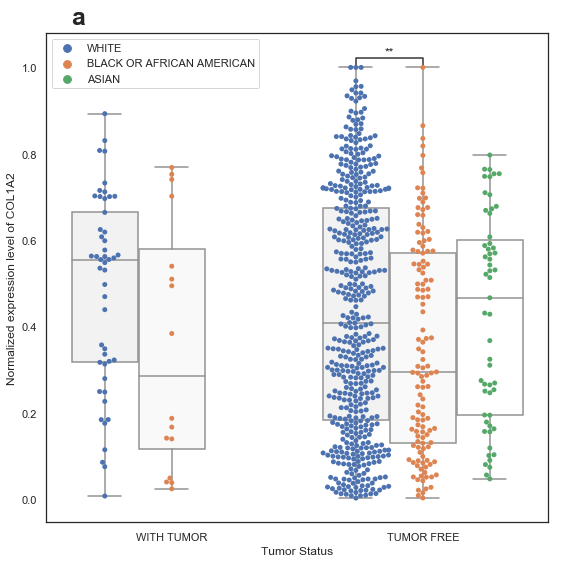

In [182]:
# We are not using box_plot function because there is no Asian with tumor in the data. We have to manually define box plot pair list.
sns.set(rc={'figure.figsize':(9,9)})
sns.set(style="white", color_codes=True)
ax=sns.boxplot(x="TUMOR_STATUS",y="COL1A2",data=mergedata2,hue="RACE",color='w')

sns.swarmplot(x="TUMOR_STATUS",y="COL1A2",data=mergedata2,hue="RACE" ,dodge=True)
plt.xticks(rotation=0)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[3:], labels[3:])


add_stat_annotation(ax,data=mergedata2,hue='RACE',x='TUMOR_STATUS',y='COL1A2',boxPairList=[(("TUMOR FREE","WHITE"),("TUMOR FREE","BLACK OR AFRICAN AMERICAN")),(("TUMOR FREE","WHITE"),("TUMOR FREE","ASIAN")),(("TUMOR FREE","BLACK OR AFRICAN AMERICAN"),("TUMOR FREE","ASIAN")),(("WITH TUMOR","WHITE"),("WITH TUMOR","BLACK OR AFRICAN AMERICAN")),(('WITH TUMOR','WHITE'),('TUMOR FREE','WHITE')),(('WITH TUMOR','BLACK OR AFRICAN AMERICAN'),('TUMOR FREE','BLACK OR AFRICAN AMERICAN'))],test='Mann-Whitney',textFormat='star',loc='inside',verbose=2)


plt.xlabel('Tumor Status')
plt.ylabel('Normalized expression level of COL1A2')
ax.text(-0.4, 1.10,"a",weight='bold',fontsize=25)
plt.savefig('tumor_col1a2.eps',format='eps',bbox_inches='tight',dpi=1000)

plt.show()

In [188]:
# We can manually check if stars (*) are correct or not
t_white=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="TUMOR FREE")&(mergedata2["RACE"] == "WHITE")]
t_black=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="TUMOR FREE")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]
t_asian=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="TUMOR FREE")& (mergedata2["RACE"] == "ASIAN")]
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(t_black['COL1A2'],t_white['COL1A2'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=25788.500, p=0.002
Different distribution (reject H0)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



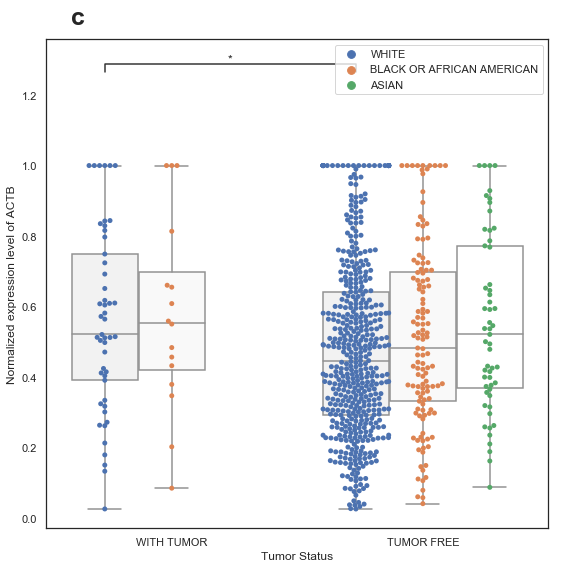

In [184]:
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN'] #removed asian because didnt have patient
tumor = ['WITH TUMOR','TUMOR FREE']

inside_cat= [((a,b[0]),(a,b[1])) for a in tumor for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(tumor,2) for b in races ]
all_cat = outside_cat+inside_cat


plot_box(mergedata2, "TUMOR_STATUS", 'ACTB', 'RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Tumor Status",
         y_label="Normalized expression level of ACTB",x_position=-0.4,y_position=1.4,c_label="c",font_size=25,figure_name='tumor_actb2.eps' ,off_set=1.2,hue_stat=True, ns=False)


In [305]:
# We can manually check if stars (*) are correct or not
t_white=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="TUMOR FREE")&(mergedata2["RACE"] == "WHITE")]
t_white2=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="WITH TUMOR")&(mergedata2["RACE"] == "WHITE")]
t_black2=mergedata2.loc[(mergedata2["TUMOR_STATUS"]=="WITH TUMOR")&(mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(t_white['ACTB'],t_white2['ACTB'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=10094.000, p=0.038
Different distribution (reject H0)


### Surgical Procedure for each Subtype

pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



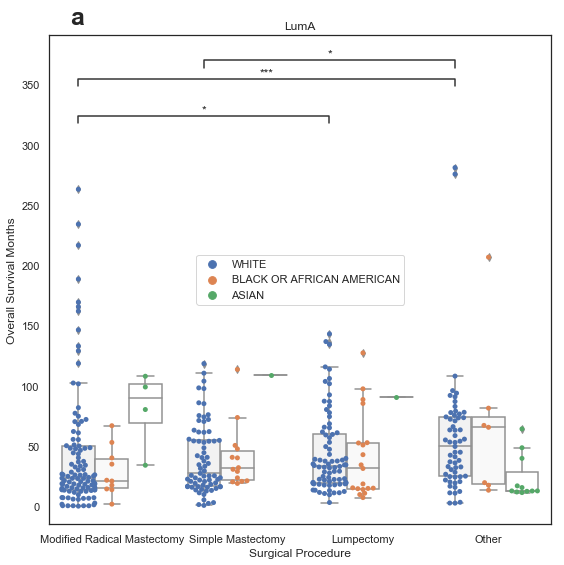

In [194]:
Luma=pd.DataFrame(mergedata2.loc[(mergedata2["SUBTYPE"] == "BRCA_LumA")])
surgical = ['Modified Radical Mastectomy','Lumpectomy', 'Simple Mastectomy', 'Other']
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN']

inside_cat= [((a,b[0]),(a,b[1])) for a in surgical for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(surgical,2) for b in races ]
all_cat = inside_cat+outside_cat


plot_box(Luma,"SURGICAL_PROCEDURE_FIRST",'OS_MONTHS','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Surgical Procedure",y_label="Overall Survival Months",x_position=-0.33,y_position=400,c_label="a",font_size=25,title="LumA",figure_name='surgical_race_luma.eps' ,off_set=1.4,hue_stat=True, ns=False)

In [310]:
# We can manually check if stars (*) are correct or not

mrm_white=Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Luma["RACE"] == "WHITE")]
lum_white=Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")&(Luma["RACE"] == "WHITE")]


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(mrm_white['OS_MONTHS'],lum_white['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=3436.500, p=0.037
Different distribution (reject H0)


In [195]:
print("Modified Radical Mastectomy")
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Luma["RACE"] == "WHITE")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Luma["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Luma["RACE"] == "ASIAN")].shape)
print("Lumpectomy")
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Luma["RACE"] == "WHITE")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Luma["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Luma["RACE"] == "ASIAN")].shape)
print("Simple Mastectomy")
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Luma["RACE"] == "WHITE")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Luma["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Luma["RACE"] == "ASIAN")].shape)
print("Other")
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Luma["RACE"] == "WHITE")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Luma["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Luma.loc[(Luma["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Luma["RACE"] == "ASIAN")].shape)


Modified Radical Mastectomy
(106, 11)
(10, 11)
(4, 11)
Lumpectomy
(79, 11)
(19, 11)
(1, 11)
Simple Mastectomy
(71, 11)
(14, 11)
(1, 11)
Other
(59, 11)
(7, 11)
(11, 11)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



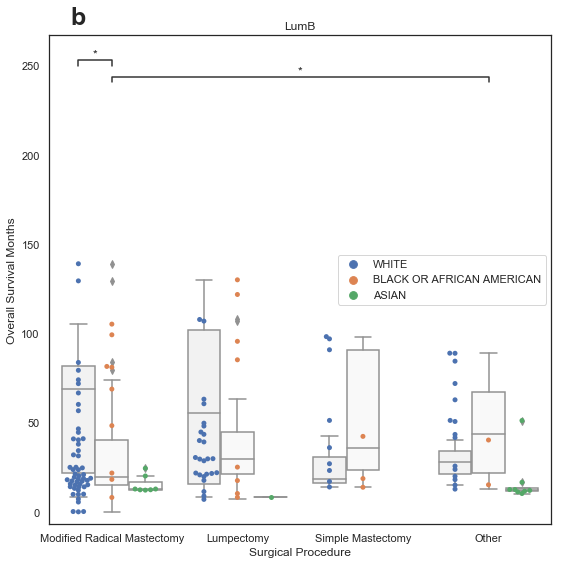

In [196]:
Lumb=pd.DataFrame(mergedata2.loc[(mergedata2["SUBTYPE"] == "BRCA_LumB")])
surgical = ['Modified Radical Mastectomy','Lumpectomy', 'Simple Mastectomy', 'Other']
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN'] # removed Asian because there is no asian patients and function gives error
race = ['WHITE', 'BLACK OR AFRICAN AMERICAN','ASIAN']
inside_cat= [((a,b[0]),(a,b[1])) for a in surgical for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(surgical,2) for b in races ]
all_cat = outside_cat+inside_cat


plot_box(Lumb,"SURGICAL_PROCEDURE_FIRST",'OS_MONTHS','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Surgical Procedure",y_label="Overall Survival Months",x_position=-0.33,y_position=273,c_label="b",font_size=25,title="LumB",figure_name='surgical_race_lumb.eps' ,off_set=1.8,hue_stat=True,hue_order=['WHITE','BLACK OR AFRICAN AMERICAN','ASIAN'],ns=False)

In [311]:
# We can manually check if stars (*) are correct or not

mrm_white=Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Lumb["RACE"] == "WHITE")]
mrm_black=Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Lumb["RACE"] == "BLACK OR AFRICAN AMERICAN")]


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(mrm_white['OS_MONTHS'],mrm_black['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=125.000, p=0.027
Different distribution (reject H0)


In [197]:
print("Modified Radical Mastectomy")
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Lumb["RACE"] == "WHITE")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Lumb["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Lumb["RACE"] == "ASIAN")].shape)
print("Lumpectomy")
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Lumb["RACE"] == "WHITE")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Lumb["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Lumb["RACE"] == "ASIAN")].shape)
print("Simple Mastectomy")
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Lumb["RACE"] == "WHITE")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Lumb["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Lumb["RACE"] == "ASIAN")].shape)
print("Other")
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Lumb["RACE"] == "WHITE")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Lumb["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Lumb.loc[(Lumb["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Lumb["RACE"] == "ASIAN")].shape)


Modified Radical Mastectomy
(52, 11)
(9, 11)
(7, 11)
Lumpectomy
(25, 11)
(8, 11)
(1, 11)
Simple Mastectomy
(9, 11)
(3, 11)
(0, 11)
Other
(15, 11)
(2, 11)
(8, 11)


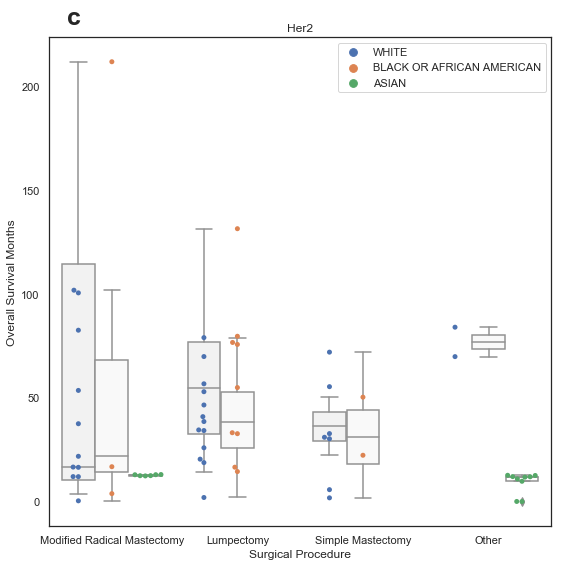

In [202]:
Her2=pd.DataFrame(mergedata2.loc[(mergedata2["SUBTYPE"] == "BRCA_Her2")])
sns.set(style="white", color_codes=True)
ax=sns.boxplot(x="SURGICAL_PROCEDURE_FIRST",y='OS_MONTHS',data=Her2,  hue="RACE", color='w',order=["Modified Radical Mastectomy","Lumpectomy","Simple Mastectomy","Other"])
sns.swarmplot(x='SURGICAL_PROCEDURE_FIRST',y='OS_MONTHS',data=Her2, dodge=True,hue="RACE",order=["Modified Radical Mastectomy","Lumpectomy","Simple Mastectomy","Other"],hue_order=["WHITE","BLACK OR AFRICAN AMERICAN","ASIAN"])
plt.xticks(rotation=0)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[3:], labels[3:])
#add_stat_annotation(ax,data=Her2,x='SURGICAL_PROCEDURE_FIRST',hue="RACE",y='OS_MONTHS',boxPairList=[(("Modified Radical Mastectomy","WHITE"),("Lumpectomy","WHITE"))],test='Mann-Whitney',textFormat='star',loc='inside',verbose=2)

plt.xlabel('Surgical Procedure')
plt.ylabel('Overall Survival Months')
ax.text(-0.36, 230,"c",weight='bold',fontsize=25)
plt.title("Her2")
plt.savefig('surgical_race_her2.eps',format='eps',bbox_inches='tight',dpi=1000)

plt.show()

In [201]:
# We can manually check if stars (*) are correct or not
her_white=Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Her2["RACE"] == "WHITE")]
her_white2=Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")&(Her2["RACE"] == "WHITE")]
her_black=Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Her2["RACE"] == "BLACK OR AFRICAN AMERICAN")]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(her_white['OS_MONTHS'],her_white2['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=62.000, p=0.602
Same distribution (fail to reject H0)


In [203]:
print("Modified Radical Mastectomy")
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Her2["RACE"] == "WHITE")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Her2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Her2["RACE"] == "ASIAN")].shape)
print("Lumpectomy")
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Her2["RACE"] == "WHITE")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Her2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Her2["RACE"] == "ASIAN")].shape)
print("Simple Mastectomy")
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Her2["RACE"] == "WHITE")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Her2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Her2["RACE"] == "ASIAN")].shape)
print("Other")
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Her2["RACE"] == "WHITE")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Her2["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Her2.loc[(Her2["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Her2["RACE"] == "ASIAN")].shape)


Modified Radical Mastectomy
(11, 11)
(3, 11)
(6, 11)
Lumpectomy
(13, 11)
(9, 11)
(0, 11)
Simple Mastectomy
(7, 11)
(2, 11)
(0, 11)
Other
(2, 11)
(0, 11)
(9, 11)


pvalue annotation legend:
ns: 4.99e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 4.99e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



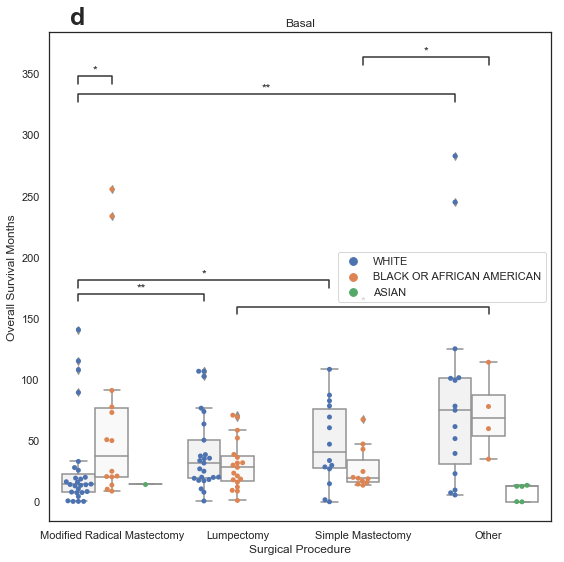

In [205]:
Basal=pd.DataFrame(mergedata2.loc[(mergedata2["SUBTYPE"] == "BRCA_Basal")])
surgical = ['Modified Radical Mastectomy','Lumpectomy', 'Simple Mastectomy', 'Other']
races= ['WHITE', 'BLACK OR AFRICAN AMERICAN']
race = ['WHITE', 'BLACK OR AFRICAN AMERICAN','ASIAN']
inside_cat= [((a,b[0]),(a,b[1])) for a in surgical for b in combinations(races, 2) ]

outside_cat= [((a[0],b),(a[1],b)) for a in combinations(surgical,2) for b in races ]
all_cat = outside_cat+inside_cat


plot_box(Basal,"SURGICAL_PROCEDURE_FIRST",'OS_MONTHS','RACE', sorted(all_cat, key= lambda x:x[0]),x_label="Surgical Procedure",y_label="Overall Survival Months",x_position=-0.33,y_position=390,c_label="d",font_size=25,title="Basal",figure_name='surgical_race_basal.eps' ,off_set=1.2,hue_stat=True,hue_order=None,ns=False)

In [313]:
# We can manually check if stars (*) are correct or not

basal_white=Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Basal["RACE"] == "WHITE")]
basal_black=Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")&(Basal["RACE"] == "BLACK OR AFRICAN AMERICAN")]


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(basal_white['OS_MONTHS'],basal_black['OS_MONTHS'],alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=98.000, p=0.013
Different distribution (reject H0)


In [206]:
print("Modified Radical Mastectomy")
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Basal["RACE"] == "WHITE")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Basal["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Modified Radical Mastectomy")& (Basal["RACE"] == "ASIAN")].shape)
print("Lumpectomy")
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Basal["RACE"] == "WHITE")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Basal["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Lumpectomy")& (Basal["RACE"] == "ASIAN")].shape)
print("Simple Mastectomy")
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Basal["RACE"] == "WHITE")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Basal["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Simple Mastectomy")& (Basal["RACE"] == "ASIAN")].shape)
print("Other")
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Basal["RACE"] == "WHITE")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Basal["RACE"] == "BLACK OR AFRICAN AMERICAN")].shape)
print(Basal.loc[(Basal["SURGICAL_PROCEDURE_FIRST"]=="Other")& (Basal["RACE"] == "ASIAN")].shape)


Modified Radical Mastectomy
(27, 11)
(14, 11)
(1, 11)
Lumpectomy
(25, 11)
(19, 11)
(0, 11)
Simple Mastectomy
(14, 11)
(11, 11)
(0, 11)
Other
(15, 11)
(4, 11)
(5, 11)


### For Figure 4 : Investigating COL1A2 ,ACTB and correlation analysis

In [207]:
# Create separate data sets for each surgical procedure
mrm=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Modified Radical Mastectomy")])
lump=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Lumpectomy")])
smas=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Simple Mastectomy")])


/Users/akutasame/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


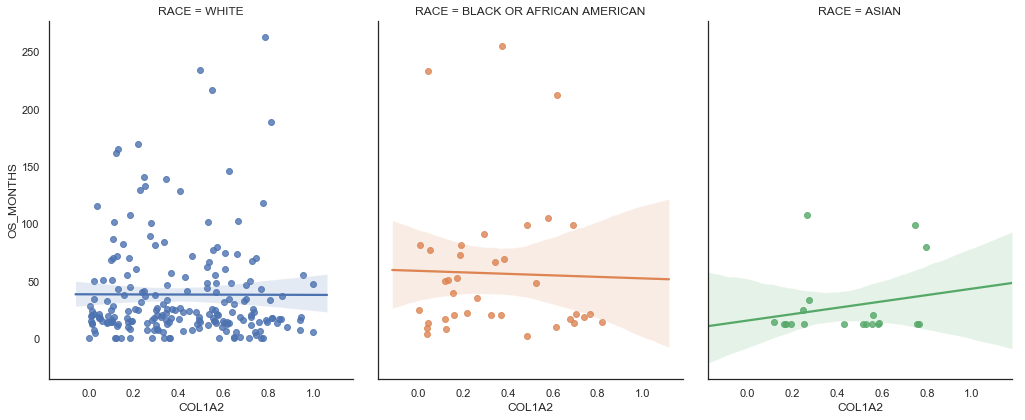

In [208]:
g = sns.lmplot(x="COL1A2", y="OS_MONTHS", hue="RACE", col="RACE",data=mrm, height=6, aspect=.8, x_jitter=0)

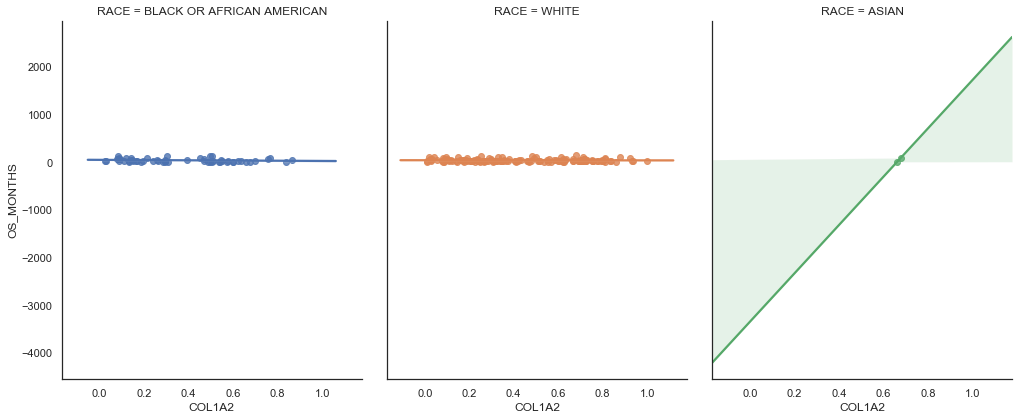

In [209]:
g = sns.lmplot(x="COL1A2", y="OS_MONTHS", hue="RACE", col="RACE",data=lump, height=6, aspect=.8, x_jitter=0)

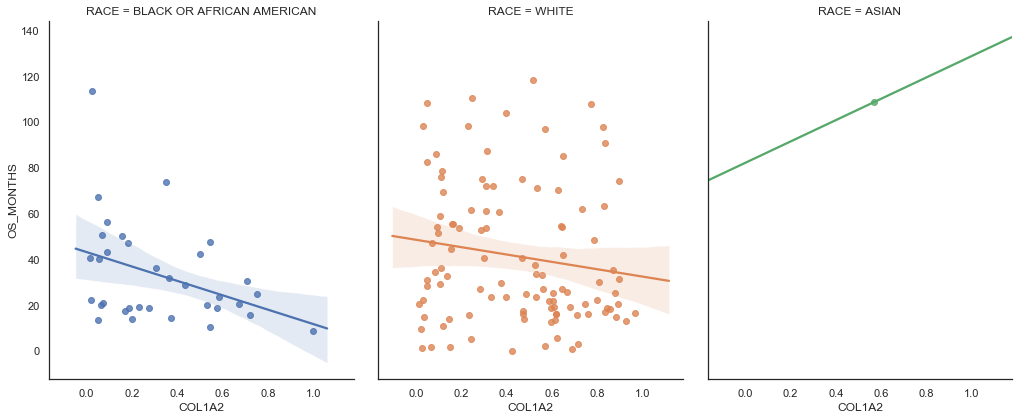

In [210]:
g = sns.lmplot(x="COL1A2", y="OS_MONTHS", hue="RACE", col="RACE",data=smas, height=6, aspect=.8, x_jitter=0)

In [ ]:
# It seems we need to explore black patients who undergone Simple Mastectomy. We checked white patients as well but we did not find anything.

In [211]:
# Exploring Simple Mastectomy by race
sim_white=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Simple Mastectomy")& (mergedata2["RACE"] == "WHITE")])
sim_black=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Simple Mastectomy")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")])
sim_asian=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Simple Mastectomy")& (mergedata2["RACE"] == "ASIAN")])


/Users/akutasame/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


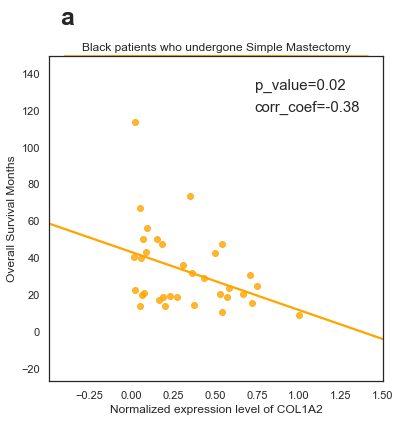

In [229]:
sns.set(style="white", color_codes=True)
p=sns.jointplot(sim_black['COL1A2'], y= sim_black['OS_MONTHS'], kind="reg",ratio=300,ci=None,color='orange')
plt.title('Black patients who undergone Simple Mastectomy')
plt.ylabel('Overall Survival Months')
plt.xlabel('Normalized expression level of COL1A2')
p.fig.text(0.6,0.8,"p_value=0.02", ha ='left', fontsize = 15)
p.fig.text(0.6,0.75,"corr_coef=-0.38", ha ='left', fontsize = 15)
p.fig.text(0.15, .95,"a",weight='bold',fontsize=25)
plt.savefig('simplemastectomy_regression_col1a2_black.eps',format='eps',dpi=1000)

In [221]:
# calculate corr coef and p-value
from scipy.stats import pearsonr
x= sim_black['COL1A2']
y = sim_black['OS_MONTHS']
corr, p_value = pearsonr(x, y)
print('correlation',corr,'p-value',p_value)


correlation -0.38179245991292116 p-value 0.025873276673760538


In [224]:
# Exploring Modified Radicial Mastectomy by race
mrm_white=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Modified Radical Mastectomy")& (mergedata2["RACE"] == "WHITE")])
mrm_black=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Modified Radical Mastectomy")& (mergedata2["RACE"] == "BLACK OR AFRICAN AMERICAN")])
mrm_asian=pd.DataFrame(mergedata2.loc[(mergedata2["SURGICAL_PROCEDURE_FIRST"] == "Modified Radical Mastectomy")& (mergedata2["RACE"] == "ASIAN")])


/Users/akutasame/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


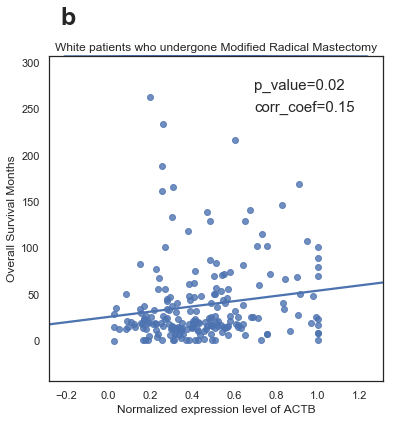

In [230]:
sns.set(style="white", color_codes=True)
p=sns.jointplot(mrm_white['ACTB'], y= mrm_white['OS_MONTHS'], kind="reg",ratio=300,ci=None)
plt.title('White patients who undergone Modified Radical Mastectomy')
plt.ylabel('Overall Survival Months')
plt.xlabel('Normalized expression level of ACTB')
p.fig.text(0.6,0.8,"p_value=0.02", ha ='left', fontsize = 15)
p.fig.text(0.6,0.75,"corr_coef=0.15", ha ='left', fontsize = 15)
p.fig.text(0.15, .95,"b",weight='bold',fontsize=25)
plt.savefig('modifiedmastectomy_regression_actb_white.eps',format='eps',bbox_inches='tight',dpi=1000)

In [227]:
# calculate corr coef and p-value
from scipy.stats import pearsonr
x= mrm_white['ACTB']
y = mrm_white['OS_MONTHS']
corr, p_value = pearsonr(x, y)
print('correlation',corr,'p-value',p_value)


correlation 0.15451866184940322 p-value 0.026956621663066702


In [234]:
# merge two data sets to include COL1A1 and COL3A1 and rna data w.r.t. patient id.
mergedata3 = pd.merge(mergedata2,
                     newrna_1[['PATIENT_ID','COL1A1','COL3A1']],
                     on='PATIENT_ID')
mergedata3.head()

,PATIENT_ID,COL1A2,EEF1A1,ACTB,AGE,RACE,TUMOR_STATUS,SURGICAL_PROCEDURE_FIRST,OS_MONTHS,SUBTYPE,GENDER,COL1A1,COL3A1
0,TCGA-3C-AAAU,0.249446,0.217603,0.301256,55.0,WHITE,WITH TUMOR,Modified Radical Mastectomy,132.95,BRCA_LumA,Female,0.399886,0.227370
1,TCGA-3C-AALI,0.507240,0.166319,0.550099,50.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Lumpectomy,131.57,BRCA_Her2,Female,0.921058,0.369134
2,TCGA-3C-AALJ,0.523817,0.316287,0.608773,62.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Modified Radical Mastectomy,48.42,BRCA_LumB,Female,1.000000,0.385403
3,TCGA-3C-AALK,0.544941,0.232810,0.227302,52.0,BLACK OR AFRICAN AMERICAN,TUMOR FREE,Simple Mastectomy,47.57,BRCA_LumA,Female,1.000000,0.451428
4,TCGA-4H-AAAK,0.720938,0.216569,0.228513,50.0,WHITE,TUMOR FREE,Modified Radical Mastectomy,11.43,BRCA_LumA,Female,1.000000,0.579344


In [235]:
#create a new data frame to check correlation
df=mergedata3[['ACTB','COL1A2','EEF1A1','COL1A1','COL3A1','AGE','RACE','OS_MONTHS']]
df['RACE'] = mergedata3['RACE'].map({"WHITE" :0, "BLACK OR AFRICAN AMERICAN":1,"ASIAN":2}) 
df.head()

/Users/akutasame/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ACTB,COL1A2,EEF1A1,COL1A1,COL3A1,AGE,RACE,OS_MONTHS
0,0.301256,0.249446,0.217603,0.399886,0.227370,55.0,0,132.95
1,0.550099,0.507240,0.166319,0.921058,0.369134,50.0,1,131.57
2,0.608773,0.523817,0.316287,1.000000,0.385403,62.0,1,48.42
3,0.227302,0.544941,0.232810,1.000000,0.451428,52.0,1,47.57
4,0.228513,0.720938,0.216569,1.000000,0.579344,50.0,0,11.43


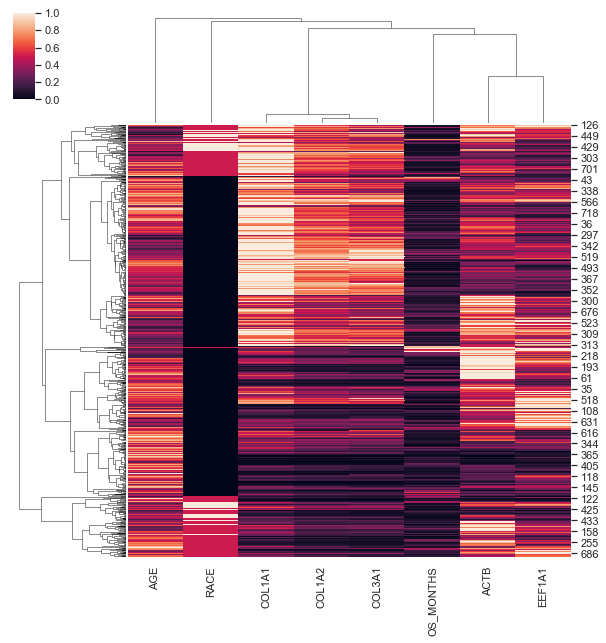

In [240]:
g = sns.clustermap(df, metric="correlation", standard_scale=1)
plt.savefig('clustermap_corr1.eps',format='eps',bbox_inches='tight',dpi=1000)


### Principal Component Analysis

In [241]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# get the path of the file of lecture1.ipynb
notebook_path = os.path.dirname("Lecture2.ipynb")
location_of_data = notebook_path +"data/BreastInvasiveTCGAPanCancerAtlas/brca_tcga_pan_can_atlas_2018/"
rna_file_name = "data_RNA_Seq_v2_expression_median.txt"
clinical_file_name = "data_clinical_patient.txt"

In [242]:
def read_rna_file(location, name_file):
        """
        input location: string, location of the file
        input name_file:string, name of the RNA seq file
        This file is tab seperated and includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
        Out put: panda data frame
        function: read the file and set the 'Hugo_Symbol', 'Entrez_Gene_Id' columns as index
        """

        import pandas as pd
    
        rna_file_path = location + name_file

        rna = pd.read_csv(rna_file_path,  sep='\t')
        
        #to make sure we do not process the name of genes we will convert them to string
        rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
        
        dic_genes_id ={}
        #make a dictionary of names of genes.
        dic_genes_id = pd.Series(rna.Hugo_Symbol.values,index=rna.Entrez_Gene_Id).to_dict()

        #deleting Hugo_Symbol 
        rna = rna.drop(columns=['Hugo_Symbol'], axis=1)
        
        # make first two columns as indexx of data frame 
        rna =  rna.set_index(['Entrez_Gene_Id']) 

    
        return (rna, dic_genes_id)

In [243]:
(rna, dic_genes_id) = read_rna_file(location_of_data, rna_file_name)
#clinical = read_clinical_file(location_of_data, clinical_file_name)
rna.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
100133144,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,1.4644,15.3396,9.5178,10.0370,...,0.3992,4.3126,0.0000,5.5624,0.0000,0.0000,14.3858,22.3240,2.2638,6.8865
100134869,12.9316,17.3790,9.2294,11.0799,14.4298,13.6090,8.9958,14.3935,11.3241,4.4426,...,14.3720,10.8828,3.0792,14.3711,6.3091,3.2580,21.4409,27.2744,7.2933,24.7795
10357,52.1503,69.7553,154.2970,143.8640,84.2128,114.2570,107.5630,116.3870,60.2630,153.1450,...,135.6240,136.1290,29.9974,128.3150,53.6278,42.2643,137.7760,64.1427,85.0461,167.5510
10431,408.0760,563.8930,1360.8300,865.5360,766.3830,807.7430,1420.5000,657.2810,977.9180,1084.3300,...,1570.1400,2886.4000,1721.8800,697.6740,1245.2700,1877.4200,652.7560,722.7210,1140.2800,1003.5700


Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

In [244]:
def normalizing_patients(df_rna_values):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    return df_normalized_rna_values

In [245]:
normalized_rna = normalizing_patients(rna)
normalized_rna.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100133144,0.000118,0.000048,0.000064,0.000028,0.000017,0.000016,0.000016,0.000059,0.000023,0.000045,...,8.616168e-07,0.000011,0.000000,0.000028,0.000000,0.000000,0.000070,0.000044,0.000009,0.000051
100134869,0.000093,0.000089,0.000051,0.000025,0.000035,0.000055,0.000096,0.000055,0.000028,0.000020,...,3.101993e-05,0.000029,0.000012,0.000073,0.000030,0.000012,0.000105,0.000054,0.000029,0.000185
10357,0.000375,0.000358,0.000853,0.000331,0.000203,0.000465,0.001142,0.000445,0.000149,0.000694,...,2.927253e-04,0.000358,0.000113,0.000656,0.000254,0.000157,0.000673,0.000126,0.000334,0.001249
10431,0.002936,0.002897,0.007526,0.001992,0.001851,0.003286,0.015083,0.002514,0.002413,0.004915,...,3.388925e-03,0.007582,0.006497,0.003564,0.005899,0.006976,0.003191,0.001422,0.004475,0.007480


In [246]:
normalized_rna_t=normalized_rna.transpose()
normalized_rna_t.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-3C-AAAU-01,0.000000,0.000118,0.000093,0.000375,0.002936,0.0,0.008541,0.000000e+00,0.000000,0.0,...,0.002992,0.006706,0.000932,0.007252,0.011934,0.001860,0.008695,0.025237,0.013635,0.008494
TCGA-3C-AALI-01,0.000000,0.000048,0.000089,0.000358,0.002897,0.0,0.002651,5.587669e-06,0.000003,0.0,...,0.005967,0.004959,0.000307,0.002305,0.006901,0.001020,0.003101,0.028283,0.006775,0.002090
TCGA-3C-AALJ-01,0.000005,0.000064,0.000051,0.000853,0.007526,0.0,0.003274,0.000000e+00,0.000000,0.0,...,0.001689,0.013999,0.000196,0.002953,0.004252,0.001835,0.002943,0.030189,0.005214,0.002818
TCGA-3C-AALK-01,0.000000,0.000028,0.000025,0.000331,0.001992,0.0,0.001272,9.520040e-07,0.000000,0.0,...,0.000908,0.001539,0.000127,0.001007,0.001988,0.000404,0.001398,0.013097,0.001798,0.001613
TCGA-4H-AAAK-01,0.000000,0.000017,0.000035,0.000203,0.001851,0.0,0.000630,1.027818e-06,0.000000,0.0,...,0.000980,0.001629,0.000118,0.001025,0.002536,0.000034,0.001874,0.009763,0.002010,0.002130


In [247]:
normalized_rna.dropna(inplace=True,axis=1) # dropping missing values
normalized_rna.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100133144,0.000118,0.000048,0.000064,0.000028,0.000017,0.000016,0.000016,0.000059,0.000023,0.000045,...,8.616168e-07,0.000011,0.000000,0.000028,0.000000,0.000000,0.000070,0.000044,0.000009,0.000051
100134869,0.000093,0.000089,0.000051,0.000025,0.000035,0.000055,0.000096,0.000055,0.000028,0.000020,...,3.101993e-05,0.000029,0.000012,0.000073,0.000030,0.000012,0.000105,0.000054,0.000029,0.000185
10357,0.000375,0.000358,0.000853,0.000331,0.000203,0.000465,0.001142,0.000445,0.000149,0.000694,...,2.927253e-04,0.000358,0.000113,0.000656,0.000254,0.000157,0.000673,0.000126,0.000334,0.001249
10431,0.002936,0.002897,0.007526,0.001992,0.001851,0.003286,0.015083,0.002514,0.002413,0.004915,...,3.388925e-03,0.007582,0.006497,0.003564,0.005899,0.006976,0.003191,0.001422,0.004475,0.007480


In [248]:
pca = PCA(n_components=10)
#n_components == min(n_samples, n_features)

In [249]:
principalComponents = pca.fit_transform(normalized_rna_t )

In [259]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Pc 1', 'Pc 2','Pc 3','Pc4','Pc 5','Pc 6','Pc 7','Pc 8','Pc 9','Pc 10'])

In [260]:
principalDf.head()

,Pc 1,Pc 2,Pc 3,Pc4,Pc 5,Pc 6,Pc 7,Pc 8,Pc 9,Pc 10
0,0.162627,0.234993,0.775305,-0.174292,0.114990,0.080887,-0.173702,0.011086,0.494080,0.130641
1,-0.108557,-0.239915,-0.215663,-0.225818,-0.036449,0.691068,0.019903,0.654941,0.073813,-0.365136
2,0.147910,-0.288653,-0.292392,0.064358,-0.171622,0.554974,-0.224466,-0.039941,0.065205,-0.038732
3,-0.915490,-0.363937,-0.052117,0.190921,-0.157236,0.204588,-0.117110,-0.052473,0.032279,-0.079403
4,-0.967280,-0.667835,-0.058946,0.104362,-0.165055,0.091244,-0.018232,-0.061662,-0.356284,0.179743


In [261]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.0304):
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

topgenes=variance_threshold_selector(normalized_rna_t, 0.051)
topgenes.head()

Entrez_Gene_Id,60,8755,1277,1278,1281,1360,1915,2335,3488,4256
TCGA-3C-AAAU-01,0.301256,0.062347,0.399886,0.249446,0.227370,0.527361,0.217603,0.331835,0.097739,0.010143
TCGA-3C-AALI-01,0.550099,0.264846,0.921058,0.507240,0.369134,0.000092,0.166319,0.548455,0.027909,0.003814
TCGA-3C-AALJ-01,0.608773,0.143836,1.000000,0.523817,0.385403,0.012199,0.316287,0.667212,0.031673,0.041856
TCGA-3C-AALK-01,0.227302,0.048693,1.000000,0.544941,0.451428,0.000278,0.232810,0.313747,0.031809,0.102973
TCGA-4H-AAAK-01,0.228513,0.029434,1.000000,0.720938,0.579344,0.000013,0.216569,0.591264,0.513996,0.098776


In [262]:
name_top_genes = list(topgenes)
genes_hugo_names = [ dic_genes_id[gene] for gene in name_top_genes]

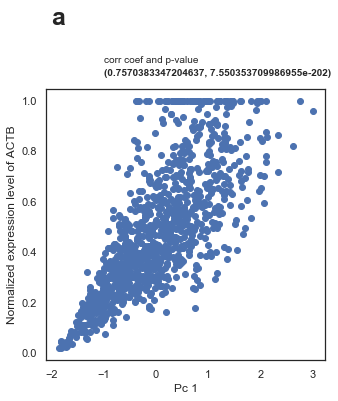

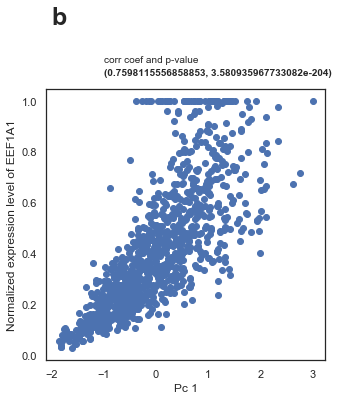

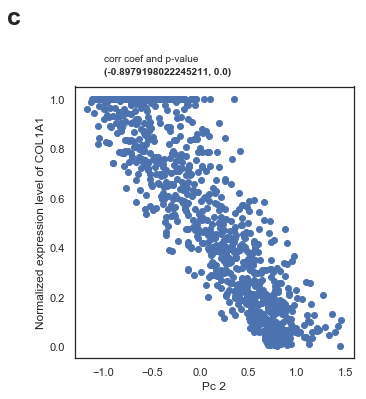

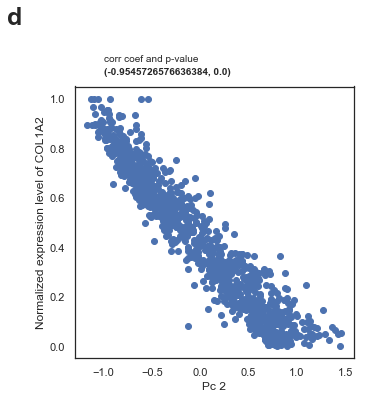

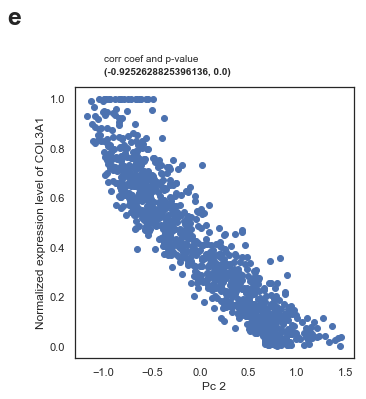

In [285]:
# get the genes which are highly correlated with PCA's
sns.set(rc={'figure.figsize':(5,5)})
sns.set(style="white", color_codes=True)
import scipy
labels=['a','b','c','d','e','f','b']
for pc in ['Pc 1', 'Pc 2','Pc 3','Pc4','Pc 5','Pc 6','Pc 7','Pc 8','Pc 9','Pc 10']:
    for gene,label in zip(name_top_genes,labels):
        pc1 = principalDf[pc]
        gene_value = topgenes[gene]
        if abs(scipy.stats.pearsonr(pc1, gene_value)[0]) > 0.75:
            
            plt.plot(pc1, gene_value, linestyle="", marker="o")
            
            plt.xlabel(pc)
            plt.ylabel("Normalized expression level of "+str(dic_genes_id[gene]))
            plt.text(-1, 1.1,scipy.stats.pearsonr(pc1, gene_value),weight='semibold',fontsize=10)
            plt.text(-1, 1.15,"corr coef and p-value",fontsize=10)
            plt.text(-2, 1.3,label,weight='bold',fontsize=25)
            plt.savefig(str(dic_genes_id[gene])+'.eps',format='eps',bbox_inches='tight',dpi=1000)
            plt.show()

### Normalization for Methods part

In [267]:
rna_2=original_rna
rna_2=rna_2.reset_index() 
rna_2 = rna_2.drop(['Hugo_Symbol','Entrez_Gene_Id'], axis=1)
rna_3=rna_2

In [268]:
rna_3['gene mean'] = rna_2.mean(axis=1,skipna=True)
rna_3['gene std'] = rna_2.std(axis=1,skipna=True)
rna_3['gene mean+std']=rna_3['gene mean']+rna_3['gene std']
rna_3.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene mean,gene std,gene mean+std
0,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.012179,0.103485,0.115664
1,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,1.4644,15.3396,9.5178,10.0370,...,5.5624,0.0000,0.0000,14.3858,22.3240,2.2638,6.8865,8.662724,7.785717,16.448441
2,12.9316,17.3790,9.2294,11.0799,14.4298,13.6090,8.9958,14.3935,11.3241,4.4426,...,14.3711,6.3091,3.2580,21.4409,27.2744,7.2933,24.7795,7.835783,5.976288,13.812071
3,52.1503,69.7553,154.2970,143.8640,84.2128,114.2570,107.5630,116.3870,60.2630,153.1450,...,128.3150,53.6278,42.2643,137.7760,64.1427,85.0461,167.5510,116.092782,61.561927,177.654709
4,408.0760,563.8930,1360.8300,865.5360,766.3830,807.7430,1420.5000,657.2810,977.9180,1084.3300,...,697.6740,1245.2700,1877.4200,652.7560,722.7210,1140.2800,1003.5700,1093.924128,467.012533,1560.936662


In [269]:
gene_mean_std=rna_3[['gene mean', 'gene mean+std']]
gene_mean_std=gene_mean_std.sort_values(['gene mean'])
gene_mean_std.tail()

,gene mean,gene mean+std
4053,96555.790454,192311.779017
229,98464.604251,138987.009662
4042,103732.862920,212443.737364
6566,106353.953922,208198.904223
4041,140933.246093,281573.645240


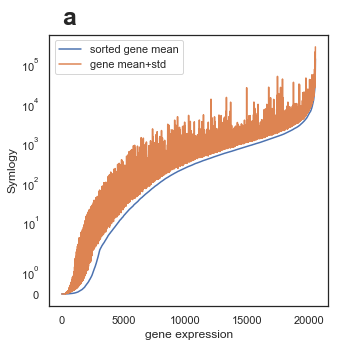

In [283]:
gene_mean_std=[(rna_3['gene mean'][i], rna_3['gene mean'][i]
               +rna_3['gene std'][i]) for i in range(len(rna_3['gene mean']))]
gene_mean_std = sorted(gene_mean_std, key=lambda x: x[0])
x_val = [x[0] for x in gene_mean_std]
y_val = [x[1] for x in gene_mean_std]

plt.plot(x_val,label='sorted gene mean')
plt.plot(y_val,label='gene mean+std')
plt.yscale('symlog')
plt.xlabel('gene expression')
plt.ylabel('Symlogy')
plt.legend()
plt.text(0, 1000000,"a",weight='bold',fontsize=25)
plt.savefig('gene_mean.eps',format='eps',bbox_inches='tight',dpi=1000)
plt.show()

In [275]:
rna_2=original_rna
rna_2=rna_2.reset_index() 
rna_2 = rna_2.drop(['Hugo_Symbol','Entrez_Gene_Id'], axis=1)
rna_4=rna_2
rna_4.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
0,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,1.4644,15.3396,9.5178,10.0370,...,0.3992,4.3126,0.0000,5.5624,0.0000,0.0000,14.3858,22.3240,2.2638,6.8865
2,12.9316,17.3790,9.2294,11.0799,14.4298,13.6090,8.9958,14.3935,11.3241,4.4426,...,14.3720,10.8828,3.0792,14.3711,6.3091,3.2580,21.4409,27.2744,7.2933,24.7795
3,52.1503,69.7553,154.2970,143.8640,84.2128,114.2570,107.5630,116.3870,60.2630,153.1450,...,135.6240,136.1290,29.9974,128.3150,53.6278,42.2643,137.7760,64.1427,85.0461,167.5510
4,408.0760,563.8930,1360.8300,865.5360,766.3830,807.7430,1420.5000,657.2810,977.9180,1084.3300,...,1570.1400,2886.4000,1721.8800,697.6740,1245.2700,1877.4200,652.7560,722.7210,1140.2800,1003.5700


In [276]:
p_mean=rna_2.mean(axis=0,skipna=True)
p_std= rna_2.std(axis=0,skipna=True)
p_std_mean=p_mean+p_std


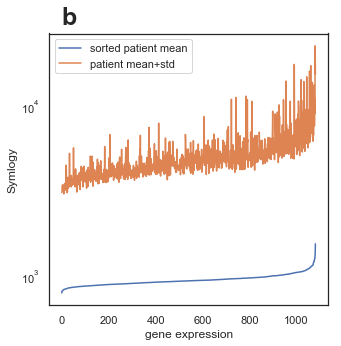

In [284]:
patient_mean_std=[(p_mean[i], p_mean[i]
               +p_std[i]) for i in range(len(p_mean))]
patient_mean_std = sorted(patient_mean_std, key=lambda x: x[0])
x_val = [x[0] for x in patient_mean_std]
y_val = [x[1] for x in patient_mean_std]

plt.plot(x_val,label='sorted patient mean')
plt.plot(y_val,label='patient mean+std')
plt.yscale('symlog')
plt.xlabel('gene expression')
plt.ylabel('Symlogy')
plt.legend()
plt.text(0, 30000,"b",weight='bold',fontsize=25)
plt.savefig('patient_mean.eps',format='eps',bbox_inches='tight',dpi=1000)
plt.show()